<a href="https://colab.research.google.com/github/EstevamHenrique/Portifolio1/blob/main/Risco_de_Credito_Inadimplencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Risco de Crédito (Inadimplência)**





# **Metodologia CRISP-DM**

### **CRISP-DM**, ou **Cross-Industry Standard Process for Data Mining**, é uma abordagem amplamente utilizada para guiar projetos de mineração de dados. Aqui está um resumo das etapas principais:

### **Entendimento do negócio:** Nesta fase inicial, os objetivos do projeto são definidos a partir da perspectiva dos negócios. Isso envolve compreender os requisitos, metas e recursos disponíveis.
### **Entendimento dos dados:** Os dados relevantes são coletados, explorados e inicialmente preparados para análise. Isso inclui a identificação de fontes de dados, a avaliação da qualidade dos dados e a seleção das variáveis mais pertinentes para o problema em questão.
###**Preparação dos dados**: Nesta etapa, os dados são limpos, transformados e integrados conforme necessário para a análise. Isso pode envolver a remoção de valores ausentes, a normalização de dados e a criação de variáveis derivadas.
###**Modelagem:** Aqui, diversas técnicas de modelagem são aplicadas aos dados preparados para desenvolver modelos que possam prever ou classificar padrões relevantes. Esta fase também inclui a seleção e ajuste dos modelos para otimizar seu desempenho.
###**Avaliação:** Os modelos criados são avaliados com base nos critérios estabelecidos durante o entendimento do negócio. Isso envolve a análise de métricas de desempenho, validação cruzada e, possivelmente, a realização de testes em conjuntos de dados de validação ou teste.
###**Implantação:** Uma vez que um modelo satisfatório tenha sido desenvolvido e avaliado, ele é implantado no ambiente de produção. Isso pode incluir a integração do modelo em sistemas existentes ou a implementação de soluções para uso prático.
###**Monitoramento:** Esta fase envolve o monitoramento contínuo do desempenho do modelo implantado no ambiente de produção. Isso permite identificar desvios de desempenho ao longo do tempo e tomar medidas corretivas, se necessário.
###Essas etapas não são necessariamente lineares e iterativas, e muitas vezes é necessário revisitar etapas anteriores conforme novos insights são descobertos ou novos requisitos surgem. O CRISP-DM fornece uma estrutura flexível e robusta para orientar o processo de mineração de dados em diversos contextos industriais.

# **ENTENDIMENTO DO NEGÓCIO**

## **Inadimplência**

### Uma fintech de Crédito iniciou sua operação de concessão de empréstimo pessoal e acompanhou a performance de pagamento de 1.000 clientes após 1 ano. Com base dessa amostra, pediu para a área de Análise de Dados verificar quais os fatores de risco dos clientes de forma a conseguir aprovar mais contratos com a menor inadimplência possível.
### Com base nessas informações, pede-se:

## **Quais fatores de risco estão mais associados a inadimplência?**

## **Com isso, o que a fintech deveria mudar de forma a minimizar a inadimplência?**


# **Instalando e Importando bibliotecas para o projeto**

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install pandas-profiling
!pip install dtreeviz
!pip install sweetviz
!pip install pydantic-settings
!pip install scikit-learn
!pip install ydata_profiling
!pip install ipywidgets
!pip install imbalanced-Learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=3a9fc596f4d6c9e645d6ed2b86dcea9dc3d7867fba11d4bddfc8e1cbbfe197f1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
     ━━━━━━━━━━━

## Importando Bibliotecas

In [ ]:
# Pacotes de preparação de dados
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Pacotes Gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import dtreeviz

#Pacotes de Modelagem
import imblearn
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from scipy.stats import ks_2samp
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **importando Base de Dados**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Cases/Inadimplência/base_Inadimplencia.xlsx', sheet_name=3)
df.head(5)

Mês_Empréstimo  ID_Cliente  Idade         Profissão    Salário  \
0               1          23     28          Contador  100000.00   
1               1          32     18  Gerente de mídia    5842.50   
2               1          35     27        Engenheiro    3605.84   
3               1          48     22           Gerente    1467.71   
4               1          53     30         Cientista   12474.85   

   Taxa_Juros_Emprestimo  Núm_Empréstimos  Saldo_Devedor  \
0                     10                3         604.77   
1                     12                1         203.56   
2                      8                1         555.48   
3                      5                0         728.06   
4                      3                3         407.60   

  Pagamento_Minimo_Cartao  Inadimplencia  
0                     Não              0  
1                     Não              0  
2                     Não              0  
3                     Não              0  
4                     Não              0

# **Entendimento e Preparação dos Dados**

## **Tipos de Variáveis**




Esta é uma análise preliminar de um DataFrame com 3778 entradas e 10 colunas.
Existem 8 variáveis quantitativas e 2 qualitativas, a variável resposta é (Inadimplencia). Para o processo de classificação será necessário transformar as variáveis categóricas em variáveis dummies.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Mês_Empréstimo           3778 non-null   int64  
 1   ID_Cliente               3778 non-null   int64  
 2   Idade                    3778 non-null   int64  
 3   Profissão                3778 non-null   object 
 4   Salário                  3778 non-null   float64
 5   Taxa_Juros_Emprestimo    3778 non-null   int64  
 6   Núm_Empréstimos          3778 non-null   int64  
 7   Saldo_Devedor            3778 non-null   float64
 8   Pagamento_Minimo_Cartao  3778 non-null   object 
 9   Inadimplencia            3778 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 295.3+ KB


## **Missing Values**
### A base de dados não possui nenhuma informação faltante

In [ ]:
df.isnull().sum()

Mês_Empréstimo             0
ID_Cliente                 0
Idade                      0
Profissão                  0
Salário                    0
Taxa_Juros_Emprestimo      0
Núm_Empréstimos            0
Saldo_Devedor              0
Pagamento_Minimo_Cartao    0
Inadimplencia              0
dtype: int64

## **Duplicações**
### O banco de dados não possui duplicaçãos

In [ ]:
df.index.duplicated().sum()

0

# **Analise Exploratória**

## **Funções para Analises IV e Frequência**

### **Função para Analise IV (Information Values)**

In [ ]:
def gera_relatorios_aed(df, html_pp='base_aed_pp.html'):
    '''
    '''
    # Gera relatório usando ydata_profiling
    perfil_pp = ProfileReport(df, title="Profiling Report")
    perfil_pp.to_file(output_file=html_pp)

    return perfil_pp


class analise_iv:

    # função private
    def __get_tab_bivariada(self, var_escolhida):

        # Cria a contagem de Target_1 e Target_0
        df_aux = self.df.copy()
        df_aux['target2'] = self.df[self.target]
        df2 = df_aux.pivot_table(values='target2',
                                 index=var_escolhida,
                                 columns=self.target,
                                 aggfunc='count')

        df2 = df2.rename(columns={0:'#Target_0',
                                  1:'#Target_1'})
        df2.fillna(0, inplace=True)

        # Cria as demais colunas da tabela bivariada
        df2['Total'] = (df2['#Target_0'] + df2['#Target_1'])
        df2['%Freq'] = (df2['Total'] / (df2['Total'].sum()) * 100).round(decimals=4)
        df2['%Target_1'] = (df2['#Target_1'] / (df2['#Target_1'].sum()) * 100).round(decimals=4)
        df2['%Target_0'] = (df2['#Target_0'] / (df2['#Target_0'].sum()) * 100).round(decimals=4)
        df2['%Target_0'] = df2['%Target_0'].apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['%Taxa_de_Target_1'] = (df2['#Target_1'] / df2['Total'] * 100).round(decimals=4)
        df2['Odds'] = (df2['%Target_1'] / df2['%Target_0']).round(decimals=4)
        df2['Odds'] = df2.Odds.apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['LN(Odds)'] = np.log(df2['Odds']).round(decimals=4)
        df2['IV'] = (((df2['%Target_1'] / 100 - df2['%Target_0'] / 100) * df2['LN(Odds)'])).round(decimals=4)
        df2['IV'] = np.where(df2['Odds'] == 0.01, 0 , df2['IV'])

        df2 = df2.reset_index()
        df2['Variavel'] = var_escolhida
        df2 = df2.rename(columns={var_escolhida: 'Var_Range'})
        df2 = df2[['Variavel','Var_Range', '#Target_1','#Target_0', 'Total', '%Freq', '%Target_1', '%Target_0',
       '%Taxa_de_Target_1', 'Odds', 'LN(Odds)', 'IV']]

        # Guarda uma cópia da tabela no histórico
        self.df_tabs_iv = pd.concat([self.df_tabs_iv, df2], axis = 0)

        return df2

    def get_bivariada(self, var_escolhida='all_vars'):

        if var_escolhida == 'all_vars':

            #vars = self.df.drop(self.target,axis = 1).columns
            vars = self.get_lista_iv().index
            for var in vars:
                tabela = self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]
                print('==> "{}" tem IV de {}'.format(var,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]['IV'].sum().round(decimals=4)))
                # printa a tabela no Jupyter
                display(tabela)

            return

        else:
            print('==> "{}" tem IV de {}'.format(var_escolhida,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]['IV'].sum().round(decimals=4)))
            return self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]


    def get_lista_iv(self):


        # agrupa a lista de IV's em ordem descrescente
        lista = (self.df_tabs_iv.groupby('Variavel').agg({'IV':'sum'})).sort_values(by=['IV'],ascending=False)

        return lista



    def __init__(self, df, target, nbins=10):

        self.df = df.copy()
        self.target = target

        #lista de variaveis numericas
        df_num = self.df.loc[:,((self.df.dtypes == 'int32') |
                                (self.df.dtypes == 'int64') |
                                (self.df.dtypes == 'float64')
                               )
                            ]

        vars = df_num.drop(target,axis = 1).columns

        for var in vars:
            nome_var = 'fx_' + var
            df_num[nome_var] = pd.qcut(df_num[var],
                                       q=nbins,
                                       precision=2,
                                       duplicates='drop')
            df_num = df_num.drop(var, axis = 1)
            df_num = df_num.rename(columns={nome_var: var})

        #lista de variaveis qualitativas
        df_str = self.df.loc[:,((self.df.dtypes == 'object') |
                                (self.df.dtypes == 'category') |
                                (self.df.dtypes == 'bool'))]


        self.df = pd.concat([df_num,df_str],axis = 1)


         # inicializa tab historica
        self.df_tabs_iv = pd.DataFrame()

        vars = self.df.drop(self.target,axis = 1).columns
        for var in vars:
            self.__get_tab_bivariada(var);

        # remove tabs de iv duplicadas
        self.df_tabs_iv = self.df_tabs_iv.drop_duplicates(subset=['Variavel','Var_Range'], keep='last')


# Função para cálculo do KS
def ks_stat(y, y_pred):
    return ks_2samp(y_pred[y==1], y_pred[y!=1]).statistic

# Função para cálculo do desempenho de modelos
def calcula_desempenho(modelo, x_train, y_train, x_test, y_test):

    # Cálculo dos valores preditos
    ypred_train = modelo.predict(x_train)
    ypred_proba_train = modelo.predict_proba(x_train)[:,1]

    ypred_test = modelo.predict(x_test)
    ypred_proba_test = modelo.predict_proba(x_test)[:,1]

    # Métricas de Desempenho
    acc_train = accuracy_score(y_train, ypred_train)
    acc_test = accuracy_score(y_test, ypred_test)

    roc_train = roc_auc_score(y_train, ypred_proba_train)
    roc_test = roc_auc_score(y_test, ypred_proba_test)

    ks_train = ks_stat(y_train, ypred_proba_train)
    ks_test = ks_stat(y_test, ypred_proba_test)

    prec_train = precision_score(y_train, ypred_train, zero_division=0)
    prec_test = precision_score(y_test, ypred_test, zero_division=0)

    recl_train = recall_score(y_train, ypred_train)
    recl_test = recall_score(y_test, ypred_test)

    f1_train = f1_score(y_train, ypred_train)
    f1_test = f1_score(y_test, ypred_test)

    df_desemp = pd.DataFrame({'Treino':[acc_train, roc_train, ks_train,
                                        prec_train, recl_train, f1_train],
                              'Teste':[acc_test, roc_test, ks_test,
                                       prec_test, recl_test, f1_test]},
                            index=['Acurácia','AUROC','KS',
                                   'Precision','Recall','F1'])

    df_desemp['Variação'] = round(df_desemp['Teste'] / df_desemp['Treino'] - 1, 2)

    return df_desemp

In [ ]:
#Matriz de Confusão
def matriz_confusao(modelo, x_train, y_train, x_test, y_test):

    plot_confusion_matrix(modelo, x_train, y_train)
    plt.title('Treino')
    plot_confusion_matrix(modelo, x_test, y_test)
    plt.title('Teste')

## **Variável "Target" Inadimplência?**


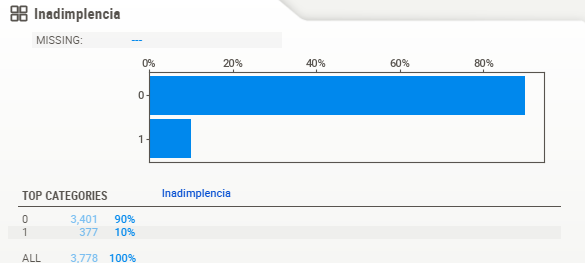

Base de dados desbalanceada

In [ ]:
df_iv = analise_iv(df, 'Inadimplencia')
df_iv.get_lista_iv()

<ipython-input-8-01bd719da326>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Inadimplencia                IV
Variavel                       
Taxa_Juros_Emprestimo    2.3353
Saldo_Devedor            2.2333
Núm_Empréstimos          1.5646
Pagamento_Minimo_Cartao  1.2406
Salário                  0.5291
Idade                    0.3133
Profissão                0.0371
ID_Cliente               0.0229
Mês_Empréstimo           0.0126

In [ ]:
gera_relatorios_aed(df)

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(df, target_feat='Inadimplencia')

# Abre o relatório no navegador
report.show_html('Sweetviz_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### **Insights "Target" Inadimplência**

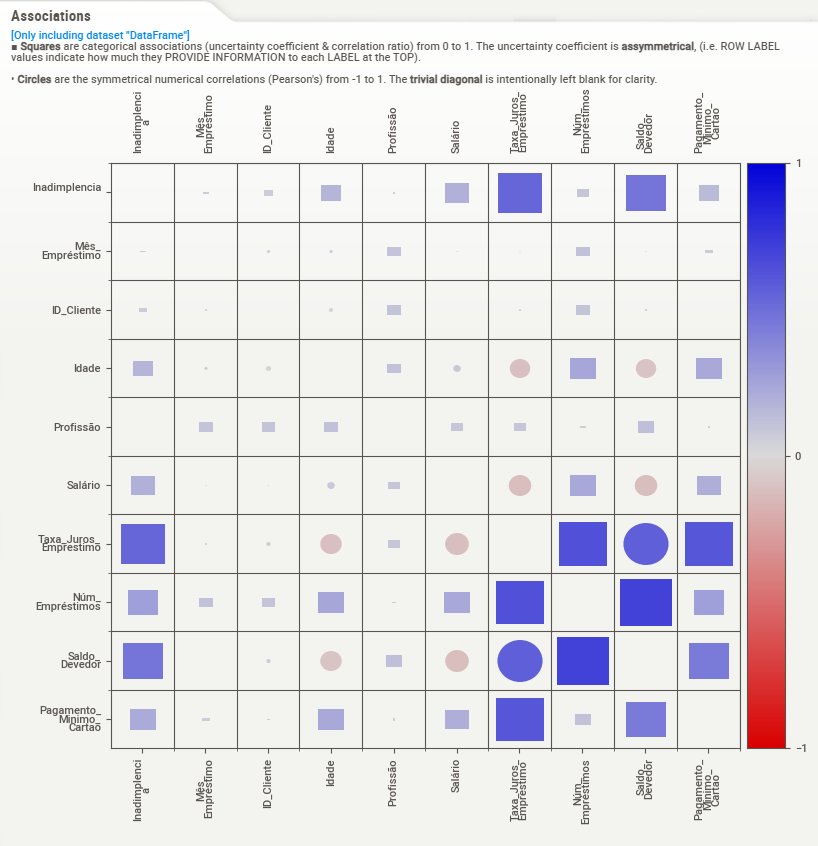

**Legenda**

* Quadrados: Representam associações categóricas (coeficiente de incerteza e razão de correlação) de 0 a 1. O coeficiente de incerteza é assimétrico (ou seja, os valores da LINHA indicam quanto eles FORNECEM INFORMAÇÕES para cada LINHA no TOPO).
* Círculos: Representam as correlações numéricas simétricas (Pearson) de -1 a 1. A diagonal trivial é intencionalmente deixada em branco para maior clareza.

**Análise da matriz de correlação**

Na matriz de correlação em questão, podemos observar as seguintes relações entre as variáveis:

* **Inadimplência**: A variável "Inadimplência" está fortemente correlacionada negativamente com as variáveis "Salário", "N° de Empréstimos" e "Saldo Devedor". Isso significa que, à medida que o salário, o número de empréstimos e o saldo devedor aumentam, a inadimplência tende a diminuir.

* **Mês Empréstimo:** A variável "Mês Empréstimo" está correlacionada positivamente com a variável "Taxa de Juros" e correlacionada negativamente com a variável "Pagamento Mínimo Cartão". Isso significa que, à medida que a taxa de juros aumenta, o valor do empréstimo tende a aumentar. Por outro lado, à medida que o pagamento mínimo do cartão de crédito aumenta, o valor do empréstimo tende a diminuir.

* **ID Cliente:** A variável "ID Cliente" não apresenta correlações significativas com as demais variáveis. Isso indica que o identificador do cliente não tem grande influência sobre a inadimplência.

* **Idade:** A variável "Idade" está correlacionada negativamente com a variável "Inadimplência". Isso significa que, à medida que a idade do cliente aumenta, a inadimplência tende a diminuir.

* **Profissão:** A variável "Profissão" não apresenta correlações significativas com as demais variáveis. Isso indica que a profissão do cliente não tem grande influência sobre a inadimplência.

* **Salário:** A variável "Salário" está fortemente correlacionada negativamente com a variável "Inadimplência". Isso significa que, à medida que o salário do cliente aumenta, a inadimplência tende a diminuir.

* **Taxa de Juros:** A variável "Taxa de Juros" está correlacionada positivamente com a variável "Empréstimo" e correlacionada negativamente com a variável "Pagamento Mínimo Cartão". Isso significa que, à medida que a taxa de juros aumenta, o valor do empréstimo tende a aumentar. Por outro lado, à medida que o pagamento mínimo do cartão de crédito aumenta, a taxa de juros tende a diminuir.

* **N° de Empréstimos:** A variável "N° de Empréstimos" está correlacionada negativamente com a variável "Inadimplência". Isso significa que, à medida que o número de empréstimos do cliente aumenta, a inadimplência tende a diminuir.

* **Saldo Devedor:** A variável "Saldo Devedor" está correlacionada negativamente com a variável "Inadimplência". Isso significa que, à medida que o saldo devedor do cliente diminui, a inadimplência tende a diminuir.

* **Pagamento Mínimo Cartão:** A variável "Pagamento Mínimo Cartão" está correlacionada negativamente com as variáveis "Empréstimo" e "Taxa de Juros". Isso significa que, à medida que o pagamento mínimo do cartão de crédito aumenta, o valor do empréstimo e a taxa de juros tendem a diminuir.

**Frequências**

Há um total de 3.778 observações no conjunto de dados.
3.401 clientes (ou 90,02%) não estão inadimplentes.
377 clientes (ou 9,98%) estão inadimplentes.

**Análise Information Value(IV)**

* **Taxa de Juros do Empréstimo (2.3353):**
A alta classificação desta variável sugere que a taxa de juros dos empréstimos tem uma forte influência na previsão da inadimplência. Isso indica que taxas de juros mais altas podem aumentar a probabilidade de inadimplência.

* **Saldo Devedor (2.2333):**
O saldo devedor também é uma variável altamente influente na previsão da inadimplência. Isso sugere que clientes com saldos devedores mais altos são mais propensos a ficar inadimplentes.

* **Número de Empréstimos (1.5646):**
Esta variável tem uma influência significativa na previsão da inadimplência. Indica que clientes com um histórico de múltiplos empréstimos podem ter uma probabilidade maior de inadimplência.

* **Pagamento Mínimo do Cartão (1.2406):**
O valor do pagamento mínimo do cartão também é uma variável importante na previsão da inadimplência. Isso sugere que clientes que pagam apenas o mínimo do cartão podem estar em maior risco de inadimplência.

* **Salário (0.5291):**
Embora menos influente do que as variáveis anteriores, o salário ainda desempenha um papel na previsão da inadimplência. Clientes com salários mais baixos podem ter maior probabilidade de inadimplência.

* **Idade (0.3133):**
A idade também é uma variável que influencia a inadimplência, embora em menor grau. Clientes mais jovens ou mais velhos podem ter diferentes perfis de risco.

* **Profissão (0.0371):**
A influência da profissão na inadimplência é bastante baixa com base nesta classificação. No entanto, dependendo do tipo de trabalho, pode haver variações no risco de inadimplência.

* **ID do Cliente (0.0229):**
Este valor sugere que o ID do cliente tem uma influência muito baixa na previsão da inadimplência, o que é esperado, pois é mais provável que seja um identificador único e não informativo.

* **Mês do Empréstimo (0.0126):**
A influência do mês do empréstimo na inadimplência também é muito baixa com base nesta classificação. Isso sugere que o mês em que o empréstimo foi feito tem pouco impacto na probabilidade de inadimplência.


Com base na classificação de importância das variáveis em relação à inadimplência (IV), segue a lista das variáveis que seriam interessantes para um modelo de classificação:

* Taxa de Juros do Empréstimo
* Saldo Devedor
* Número de Empréstimos
* Pagamento Mínimo do Cartão
* Salário
* Idade

## **Taxa de Juros do Empréstimo**

Taxa de Juros do Empréstimo concedido

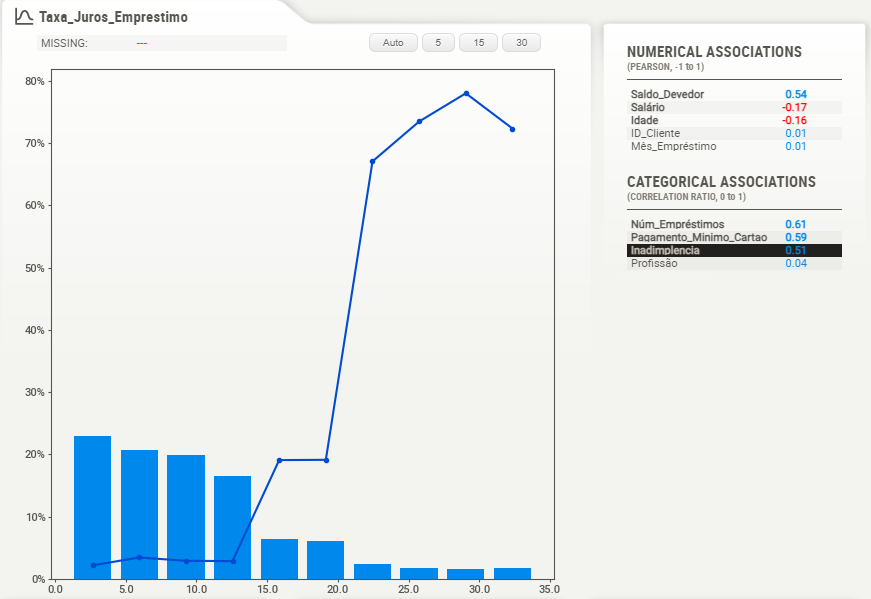

In [ ]:
#estatistica descritiva Taxa_Juros_Emprestimo
df['Taxa_Juros_Emprestimo'].describe()


count    3778.000000
mean        9.732398
std         6.875081
min         1.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        34.000000
Name: Taxa_Juros_Emprestimo, dtype: float64

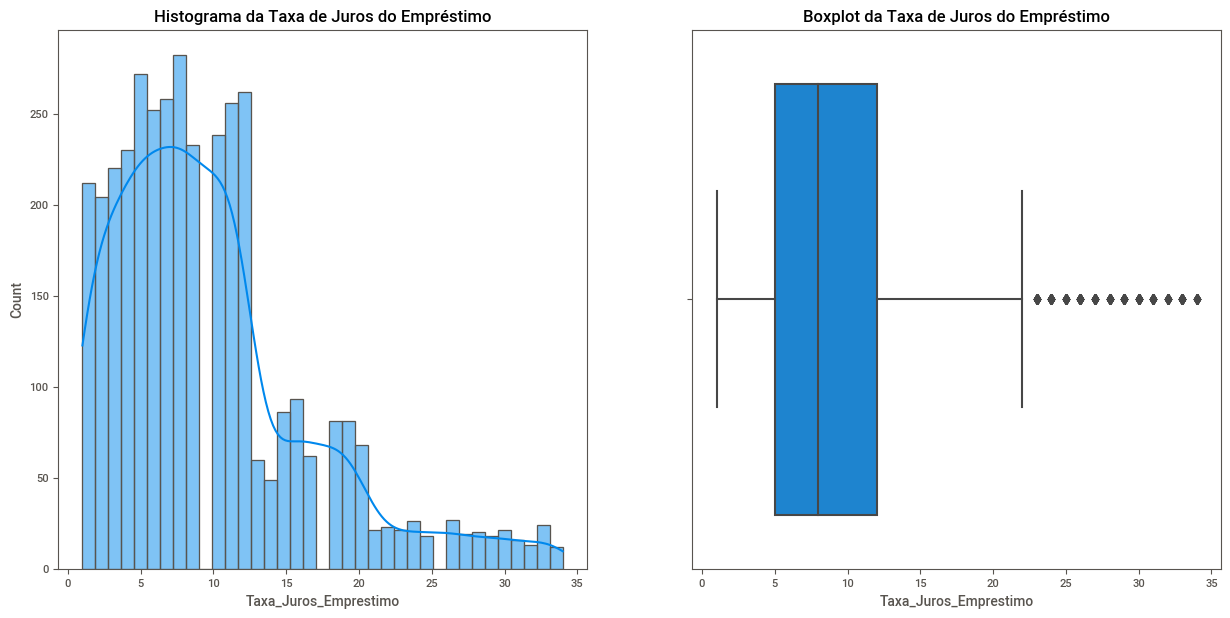

In [ ]:
#Histograma + boxplot
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Taxa_Juros_Emprestimo", kde=True)
plt.title("Histograma da Taxa de Juros do Empréstimo")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Taxa_Juros_Emprestimo")
plt.title("Boxplot da Taxa de Juros do Empréstimo")

plt.show()

In [ ]:
#Identificando a quantidade de outliers e o percentual deles na variável

# Calculando os limites superior e inferior
q1 = df['Taxa_Juros_Emprestimo'].quantile(0.25)
q3 = df['Taxa_Juros_Emprestimo'].quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

# Identificando os outliers
outliers = df[((df['Taxa_Juros_Emprestimo'] < limite_inferior) | (df['Taxa_Juros_Emprestimo'] > limite_superior))]

# Quantidade de outliers
qtd_outliers = len(outliers)

# Percentual de outliers
percentual_outliers = (qtd_outliers / len(df)) * 100

# Imprimindo os resultados
print(f'Quantidade de outliers: {qtd_outliers}')
print(f'Percentual de outliers: {percentual_outliers:.2f}%')


Quantidade de outliers: 235
Percentual de outliers: 6.22%


In [ ]:
df_iv.get_bivariada(var_escolhida= 'Taxa_Juros_Emprestimo')

==> "Taxa_Juros_Emprestimo" tem IV de 2.3353


Inadimplencia               Variavel     Var_Range  #Target_1  #Target_0  \
0              Taxa_Juros_Emprestimo   (0.99, 2.0]         10        406   
1              Taxa_Juros_Emprestimo    (2.0, 4.0]          9        441   
2              Taxa_Juros_Emprestimo    (4.0, 5.0]         11        261   
3              Taxa_Juros_Emprestimo    (5.0, 7.0]         16        494   
4              Taxa_Juros_Emprestimo    (7.0, 8.0]          8        274   
5              Taxa_Juros_Emprestimo   (8.0, 10.0]         14        457   
6              Taxa_Juros_Emprestimo  (10.0, 11.0]          8        248   
7              Taxa_Juros_Emprestimo  (11.0, 14.0]         10        361   
8              Taxa_Juros_Emprestimo  (14.0, 19.0]         80        323   
9              Taxa_Juros_Emprestimo  (19.0, 34.0]        211        136   

Inadimplencia  Total    %Freq  %Target_1  %Target_0  %Taxa_de_Target_1  \
0                416  11.0111     2.6525    11.9377             2.4038   
1                450  11.9111     2.3873    12.9668             2.0000   
2                272   7.1996     2.9178     7.6742             4.0441   
3                510  13.4992     4.2440    14.5251             3.1373   
4                282   7.4643     2.1220     8.0565             2.8369   
5                471  12.4669     3.7135    13.4372             2.9724   
6                256   6.7761     2.1220     7.2920             3.1250   
7                371   9.8200     2.6525    10.6145             2.6954   
8                403  10.6670    21.2202     9.4972            19.8511   
9                347   9.1848    55.9682     3.9988            60.8069   

Inadimplencia     Odds  LN(Odds)      IV  
0               0.2222   -1.5042  0.1397  
1               0.1841   -1.6923  0.1790  
2               0.3802   -0.9671  0.0460  
3               0.2922   -1.2303  0.1265  
4               0.2634   -1.3341  0.0792  
5               0.2764   -1.2859  0.1250  
6               0.2910   -1.2344  0.0638  
7               0.2499   -1.3867  0.1104  
8               2.2344    0.8040  0.0943  
9              13.9962    2.6388  1.3714

### **Insights Taxa_Juros_Empréstimo**



**Frequência e Distribuição:**

* Distribuição dos Intervalos de Taxa de Juros:
A maioria das observações (40,47%) está na faixa de juros entre 6,5% e 12,0%.
A segunda faixa mais comum é de 0,967% a 6,5%, representando 36,79% das observações.
As outras faixas de juros têm uma frequência relativa menor, indicando uma distribuição mais dispersa.

* Percentagem Acumulada de Observações:
Até a faixa de juros entre 6,5% e 12,0%, aproximadamente 40,47% das observações foram registradas.
A frequência acumulada continua aumentando com cada faixa de juros, atingindo 100% na faixa de juros entre 28,5% e 34,0%.

* Variação na Frequência Relativa:
A frequência relativa diminui gradualmente à medida que as faixas de juros aumentam, sugerindo que faixas de juros mais altas são menos comuns na amostra analisada.

**%Taxa de Target1 (Taxa de Inadimplência):**

* Faixa de Taxa de Juros: (19.0, 34.0]
Percentual de Inadimplência: 55,97%

* Faixa de Taxa de Juros: (14.0, 19.0]
Percentual de Inadimplência: 21,22%

* Faixa de Taxa de Juros: (8.0, 10.0]
Percentual de Inadimplência: 3,71%

**Odds:**

* Faixa de Taxa de Juros: (19.0, 34.0]
%Taxa de Target1: 55,97%
Odds: 13,9962
Chances de Inadimplência: 13,9962 para 1

* Faixa de Taxa de Juros: (14.0, 19.0]
%Taxa de Target1: 21,22%
Odds: 2,2344
Chances de Inadimplência: 2,2344 para 1

* Faixa de Taxa de Juros: (10.0, 11.0]
%Taxa de Target1: 2,12%
Odds: 0,2910
Chances de Inadimplência: 0,2910 para 1

**IV (Information Value):**

Com um IV de 2,3353, a taxa de juros do empréstimo demonstra ter uma forte associação com a inadimplência. Isso sugere que a taxa de juros do empréstimo é uma variável importante na modelagem de risco de crédito e na previsão da probabilidade de inadimplência.

## **Variável Saldo_Devedor**

Qte de categorias de produtos (ex: lanches, comida japonesa, doces etc) pedidos nos ultimos 3 meses anteriores à data de extração.

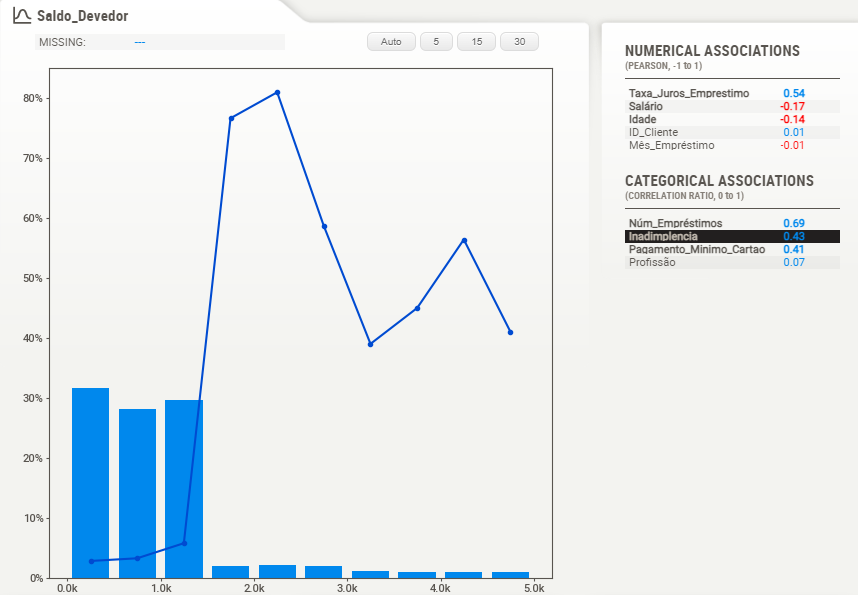

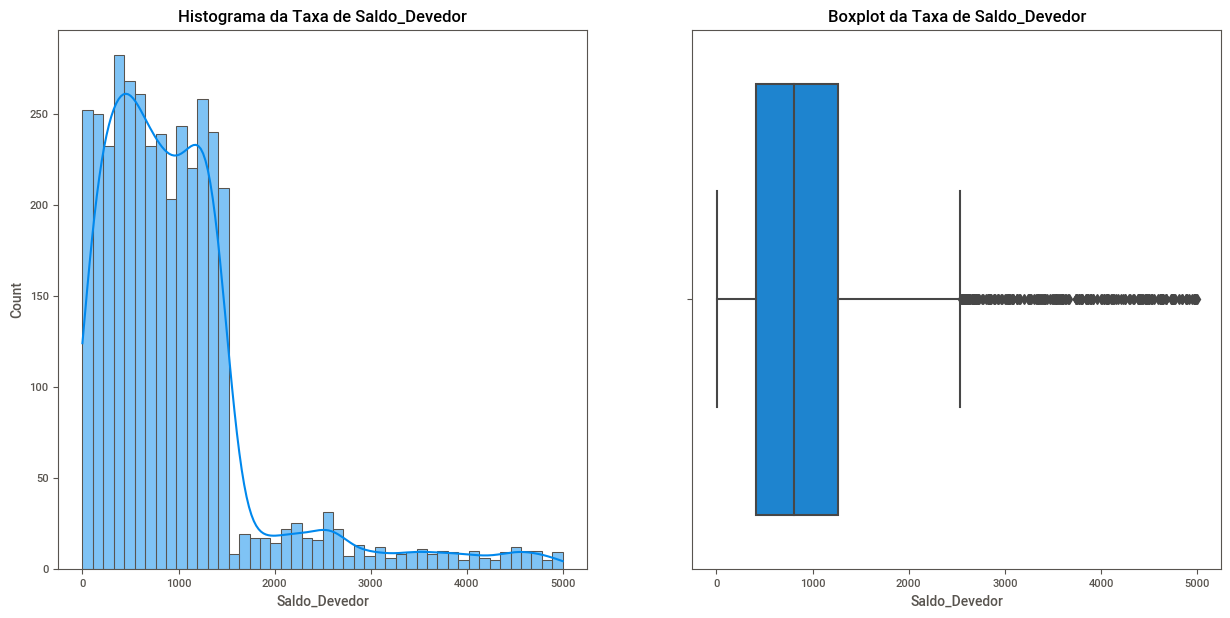

In [ ]:
#Histograma + boxplot
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Saldo_Devedor", kde=True)
plt.title("Histograma da Taxa de Saldo_Devedor")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Saldo_Devedor")
plt.title("Boxplot da Taxa de Saldo_Devedor")

plt.show()


A presença de outliers pode atrapalhar a criação de um modelo de regressão de diversas maneiras:

**Distorcendo a relação entre as variáveis:** Os outliers podem levar a uma relação artificialmente forte entre as variáveis ​​preditoras e a variável de resposta, o que pode levar a um modelo impreciso e com baixa capacidade de generalização.

**Aumentando a variância do erro:** Os outliers podem aumentar a variância do erro do modelo, o que pode levar a uma menor precisão nas estimativas dos coeficientes de regressão.

**Reduzindo a eficiência do modelo:** Os outliers podem reduzir a eficiência do modelo, o que significa que ele precisa de mais dados para obter a mesma precisão que um modelo sem outliers.

In [ ]:
#Identificando a quantidade de outliers e o percentual deles na variável

# Calculate the interquartile range (IQR)
q1 = df['Saldo_Devedor'].quantile(0.25)
q3 = df['Saldo_Devedor'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[((df['Saldo_Devedor'] < lower_bound) | (df['Saldo_Devedor'] > upper_bound))]

# Count the number of outliers
outlier_count = outliers.shape[0]

# Calculate the percentage of outliers
outlier_percentage = (outlier_count / df.shape[0]) * 100

# Print the results
print(f"Number of outliers: {outlier_count}")
print(f"Percentage of outliers: {outlier_percentage:.2f}%")


Number of outliers: 224
Percentage of outliers: 5.93%


O boxplot

In [ ]:
#Análise IV
df_iv.get_bivariada('Saldo_Devedor')

==> "Saldo_Devedor" tem IV de 2.2333


Inadimplencia       Variavel           Var_Range  #Target_1  #Target_0  Total  \
0              Saldo_Devedor      (0.22, 166.42]         10        368    378   
1              Saldo_Devedor    (166.42, 334.65]         14        364    378   
2              Saldo_Devedor    (334.65, 475.79]          8        370    378   
3              Saldo_Devedor    (475.79, 640.06]         13        364    377   
4              Saldo_Devedor    (640.06, 809.96]         10        368    378   
5              Saldo_Devedor   (809.96, 1002.34]         14        364    378   
6              Saldo_Devedor  (1002.34, 1181.42]          9        368    377   
7              Saldo_Devedor  (1181.42, 1340.85]         25        353    378   
8              Saldo_Devedor  (1340.85, 1643.92]         45        333    378   
9              Saldo_Devedor  (1643.92, 4998.07]        229        149    378   

Inadimplencia    %Freq  %Target_1  %Target_0  %Taxa_de_Target_1     Odds  \
0              10.0053     2.6525    10.8203             2.6455   0.2451   
1              10.0053     3.7135    10.7027             3.7037   0.3470   
2              10.0053     2.1220    10.8792             2.1164   0.1951   
3               9.9788     3.4483    10.7027             3.4483   0.3222   
4              10.0053     2.6525    10.8203             2.6455   0.2451   
5              10.0053     3.7135    10.7027             3.7037   0.3470   
6               9.9788     2.3873    10.8203             2.3873   0.2206   
7              10.0053     6.6313    10.3793             6.6138   0.6389   
8              10.0053    11.9363     9.7912            11.9048   1.2191   
9              10.0053    60.7427     4.3811            60.5820  13.8647   

Inadimplencia  LN(Odds)      IV  
0               -1.4061  0.1148  
1               -1.0584  0.0740  
2               -1.6342  0.1431  
3               -1.1326  0.0822  
4               -1.4061  0.1148  
5               -1.0584  0.0740  
6               -1.5114  0.1275  
7               -0.4480  0.0168  
8                0.1981  0.0042  
9                2.6293  1.4819

### **Insigths Saldo_Devedor**

Dentre as faixas analisadas, a faixa com maior inadimplência é (1643.92, 4998.07], com uma taxa de target 1 de 60.74% e uma odds de 13.8647. Além disso, essa faixa contribui com um IV significativo de 1.4819 para a previsão da inadimplência, indicando que ela tem a maior importância na segmentação dos clientes em relação à inadimplência.

**Frequência, %Taxa_Inadimplência, ODDS e IV**

**Faixa de Valor: (0.22, 166.42)**
* Frequência: Esta faixa tem uma frequência de 378 observações, representando 10.01% do total.
* % Taxa de Target 1: A taxa de target 1 é de 2.65%, indicando uma baixa incidência de inadimplência nessa faixa.
* Odds: A odds é de 0.2451, sugerindo que as chances de inadimplência são baixas nessa faixa.
* IV: O IV é de 0.1148, indicando uma contribuição moderada para a previsão da inadimplência.

**Faixa de Valor: (166.42, 334.65)**

* Frequência: Esta faixa tem uma frequência de 378 observações, representando 10.01% do total.
* % Taxa de Target 1: A taxa de target 1 é de 3.71%, indicando uma incidência moderada de inadimplência nessa faixa.
* Odds: A odds é de 0.3470, sugerindo que as chances de inadimplência são moderadas nessa faixa.
* IV: O IV é de 0.0740, indicando uma contribuição moderada para a previsão da inadimplência.

**Faixa de Valor: (334.65, 475.79)**

* Frequência: Esta faixa tem uma frequência de 378 observações, representando 10.01% do total.
* % Taxa de Target 1: A taxa de target 1 é de 2.12%, indicando uma baixa incidência de inadimplência nessa faixa.
* Odds: A odds é de 0.1951, sugerindo que as chances de inadimplência são baixas nessa faixa.
* IV: O IV é de 0.1431, indicando uma contribuição moderada para a previsão da inadimplência.

**Faixa de Valor: (475.79, 640.06)**

* Frequência: Esta faixa tem uma frequência de 377 observações, representando 9.98% do total.
* % Taxa de Target 1: A taxa de target 1 é de 3.45%, indicando uma incidência moderada de inadimplência nessa faixa.
* Odds: A odds é de 0.3222, sugerindo que as chances de inadimplência são moderadas nessa faixa.
* IV: O IV é de 0.0822, indicando uma contribuição moderada para a previsão da inadimplência.

**Faixa de Valor: (640.06, 809.96)**

* Frequência: Esta faixa tem uma frequência de 378 observações, representando 10.01% do total.
* % Taxa de Target 1: A taxa de target 1 é de 2.65%, indicando uma baixa incidência de inadimplência nessa faixa.
* Odds: A odds é de 0.2451, sugerindo que as chances de inadimplência são baixas nessa faixa.
* IV: O IV é de 0.1148, indicando uma contribuição moderada para a previsão da inadimplência.

**Faixa de Valor: (809.96, 1002.34)**

* Frequência: Esta faixa tem uma frequência de 378 observações, representando 10.01% do total.
* % Taxa de Target 1: A taxa de target 1 é de 3.71%, indicando uma incidência moderada de inadimplência nessa faixa.
* Odds: A odds é de 0.3470, sugerindo que as chances de inadimplência são moderadas nessa faixa.
* IV: O IV é de 0.0740, indicando uma contribuição moderada para a previsão da inadimplência.

**Faixa de Valor: (1002.34, 1181.42)**

* Frequência: Esta faixa tem uma frequência de 377 observações, representando 9.98% do total.
* % Taxa de Target 1: A taxa de target 1 é de 2.39%, indicando uma baixa incidência de inadimplência nessa faixa.
* Odds: A odds é de 0.2206, sugerindo que as chances de inadimplência são baixas nessa faixa.
* IV: O IV é de 0.1275, indicando uma contribuição moderada para a previsão da inadimplência.

**Faixa de Valor: (1181.42, 1340.85)**

* Frequência: Esta faixa tem uma frequência de 378 observações, representando 10.01% do total.
* % Taxa de Target 1: A taxa de target 1 é de 6.63%, indicando uma incidência moderada de inadimplência nessa faixa.
* Odds: A odds é de 0.6389, sugerindo que as chances de inadimplência são moderadas nessa faixa.
* IV: O IV é de 0.0168, indicando uma contribuição leve para a previsão da inadimplência.

**Faixa de Valor: (1340.85, 1643.92)**

* Frequência: Esta faixa tem uma frequência de 378 observações, representando 10.01% do total.
* % Taxa de Target 1: A taxa de target 1 é de 11.94%, indicando uma incidência alta de inadimplência nessa faixa.
* Odds: A odds é de 1.2191, sugerindo que as chances de inadimplência são altas nessa faixa.
* IV: O IV é de 0.0042, indicando uma contribuição muito leve para a previsão da inadimplência.

**Faixa de Valor: (1643.92, 4998.07)**

* Frequência: Esta faixa tem uma frequência de 378 observações, representando 10.01% do total.
* % Taxa de Target 1: A taxa de target 1 é de 60.74%, indicando uma incidência muito alta de inadimplência nessa faixa.
* Odds: A odds é de 13.8647, sugerindo que as chances de inadimplência são muito altas nessa faixa.
* IV: O IV é de 1.4819, indicando uma contribuição substancial para a previsão da inadimplência.




## **Variável Núm_Empréstimos**

Número de empréstimos que o cliente já teve no mercado

In [ ]:
df.columns

Index(['Mês_Empréstimo', 'ID_Cliente', 'Idade', 'Profissão', 'Salário',
       'Taxa_Juros_Emprestimo', 'Núm_Empréstimos', 'Saldo_Devedor',
       'Pagamento_Minimo_Cartao', 'Inadimplencia'],
      dtype='object')

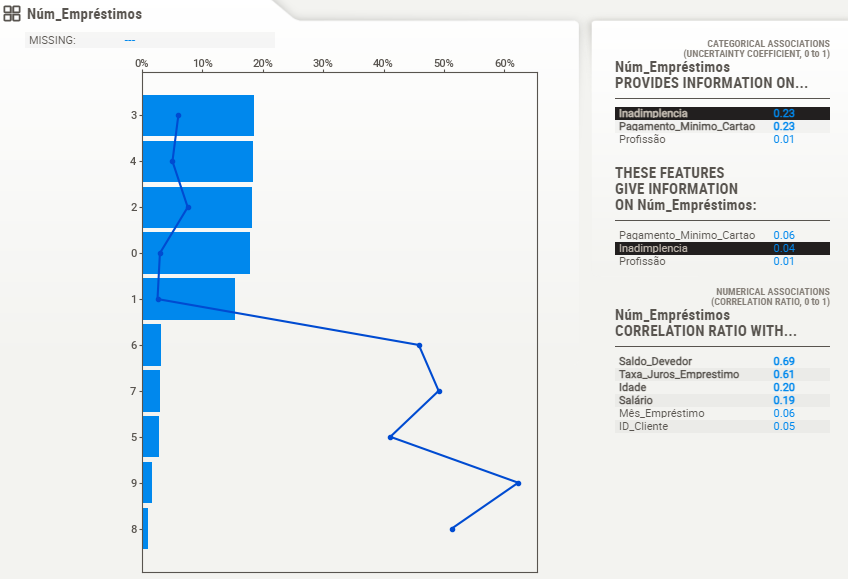

In [ ]:
df.columns

Index(['Mês_Empréstimo', 'ID_Cliente', 'Idade', 'Profissão', 'Salário',
       'Taxa_Juros_Emprestimo', 'Núm_Empréstimos', 'Saldo_Devedor',
       'Pagamento_Minimo_Cartao', 'Inadimplencia'],
      dtype='object')

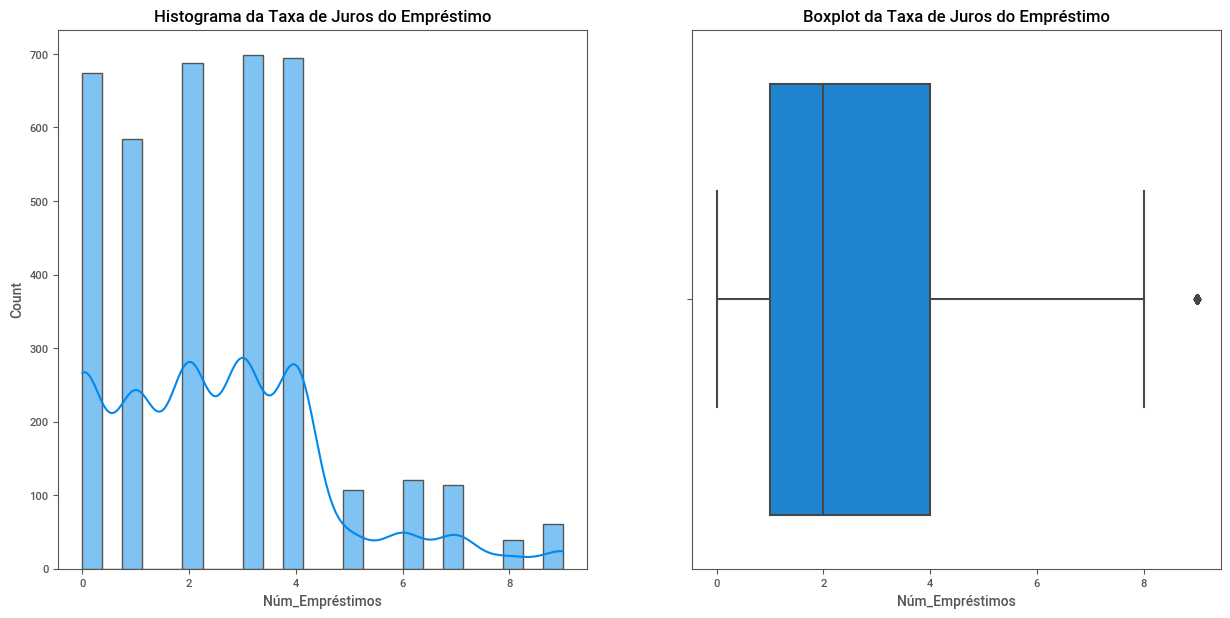

In [ ]:
#Histograma + boxplot
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Núm_Empréstimos", kde=True)
plt.title("Histograma da Taxa de Juros do Empréstimo")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Núm_Empréstimos")
plt.title("Boxplot da Taxa de Juros do Empréstimo")

plt.show()

In [ ]:
# Medidas descritivas

df['Núm_Empréstimos'].describe()


count    3778.000000
mean        2.578613
std         2.033291
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Núm_Empréstimos, dtype: float64

In [ ]:
#Análise IV
df_iv.get_bivariada('Núm_Empréstimos')

==> "Núm_Empréstimos" tem IV de 1.5646


Inadimplencia         Variavel     Var_Range  #Target_1  #Target_0  Total  \
0              Núm_Empréstimos  (-0.01, 1.0]         35       1223   1258   
1              Núm_Empréstimos    (1.0, 2.0]         52        635    687   
2              Núm_Empréstimos    (2.0, 3.0]         42        656    698   
3              Núm_Empréstimos    (3.0, 4.0]         35        659    694   
4              Núm_Empréstimos    (4.0, 5.0]         44         63    107   
5              Núm_Empréstimos    (5.0, 9.0]        169        165    334   

Inadimplencia    %Freq  %Target_1  %Target_0  %Taxa_de_Target_1    Odds  \
0              33.2980     9.2838    35.9600             2.7822  0.2582   
1              18.1842    13.7931    18.6710             7.5691  0.7387   
2              18.4754    11.1406    19.2884             6.0172  0.5776   
3              18.3695     9.2838    19.3767             5.0432  0.4791   
4               2.8322    11.6711     1.8524            41.1215  6.3005   
5               8.8407    44.8276     4.8515            50.5988  9.2399   

Inadimplencia  LN(Odds)      IV  
0               -1.3540  0.3612  
1               -0.3029  0.0148  
2               -0.5489  0.0447  
3               -0.7358  0.0743  
4                1.8406  0.1807  
5                2.2235  0.8889

### **Insights Núm_Empréstimos**

**Frequência**

**Faixa (-0.01, 1.0):**

* Esta faixa tem a maior frequência absoluta, indicando que a maioria dos clientes tem entre 0 e 1 empréstimo.
* Cerca de 30.84% dos clientes estão nesta faixa, representando uma parte significativa da amostra.
* Isso sugere que a maioria dos clientes possui um número baixo de empréstimos.

**Faixa (1.0, 2.0):**

* A segunda faixa mais frequente, com aproximadamente 16.81% dos clientes, tem entre 1 e 2 empréstimos.
* Embora menor que a primeira faixa, ainda representa uma parcela considerável dos clientes.
* Isso pode indicar que uma parte substancial dos clientes possui pelo menos um empréstimo adicional.

**Faixa (2.0, 3.0):**

* Similar à faixa anterior, esta faixa representa cerca de 17.12% dos clientes, indicando que uma parte significativa tem entre 2 e 3 empréstimos.
* Isso sugere que há uma distribuição razoavelmente uniforme de clientes com 1, 2 ou 3 empréstimos.

**Faixa (3.0, 4.0):**

* Esta faixa também é bastante comum, com aproximadamente 17.00% dos clientes tendo entre 3 e 4 empréstimos.
* Indica que há uma continuação da distribuição de clientes com múltiplos empréstimos.

**Faixa (5.0, 9.0):**

* Embora menos comum do que as faixas anteriores, esta faixa ainda representa uma parte substancial dos clientes, com cerca de 8.19%.
* Isso sugere que uma parcela significativa dos clientes tem entre 5 e 9 empréstimos, o que pode indicar uma maior complexidade financeira ou atividade de empréstimos.


**%Taxa_Target, ODDS e IV**




**Faixa (5.0, 9.0]**

* Esta faixa apresenta a maior taxa de inadimplência, com 44.83% dos casos sendo inadimplentes.
* A taxa de inadimplência nesta faixa é significativamente maior do que a taxa de adimplência, com uma relação de odds de 9.2399.
* O IV para esta faixa é 0.8889, indicando uma contribuição significativa para a previsão da variável alvo.

**Faixa (4.0, 5.0]**

* Esta faixa também apresenta uma alta taxa de inadimplência, com 11.67% dos casos sendo inadimplentes.
* A taxa de inadimplência nesta faixa é consideravelmente maior do que a taxa de adimplência, com uma relação de odds de 6.3005.
* O IV para esta faixa é 0.1807, indicando uma contribuição moderada para a previsão da variável alvo.

Quanto maior o número de emprestimos maior a taxa de inadimplência.

## **Variável Pagamento_Minimo_Cartao**

Limite de Crédito que o cliente tem no mercado. A empresa comprou essa variável de um Bureau de Crédito. Quanto maior é o limite, maior é a chance do cliente ter um bom poder aquisitivo.

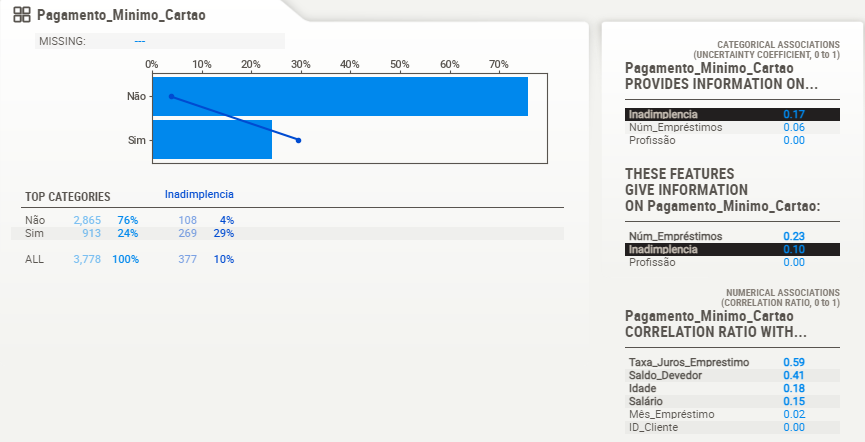

In [ ]:
#Análise IV
df_iv.get_bivariada('Pagamento_Minimo_Cartao')

==> "Pagamento_Minimo_Cartao" tem IV de 1.2406


Inadimplencia                 Variavel Var_Range  #Target_1  #Target_0  Total  \
0              Pagamento_Minimo_Cartao       Não        108       2757   2865   
1              Pagamento_Minimo_Cartao       Sim        269        644    913   

Inadimplencia    %Freq  %Target_1  %Target_0  %Taxa_de_Target_1    Odds  \
0              75.8338    28.6472    81.0644             3.7696  0.3534   
1              24.1662    71.3528    18.9356            29.4633  3.7682   

Inadimplencia  LN(Odds)      IV  
0               -1.0402  0.5452  
1                1.3266  0.6954

### **Insights Limite_Credito_Mercado**



**Pagamento_Minimo_Cartao:**

* Não: 75,83% dos clientes não realizam o pagamento mínimo do cartão.
* Sim: 24,17% dos clientes realizam o pagamento mínimo do cartão.

**Inadimplencia:**

* Target_1 (Inadimplentes): 29,46% dos clientes são inadimplentes.
* Target_0 (Adimplentes): 70,54% dos clientes são adimplentes.

**Taxa de Inadimplência:**

* A taxa de inadimplência é significativamente maior para clientes que não realizam o pagamento mínimo do cartão (37,69%) em comparação com aqueles que realizam (18,94%).

**Odds Ratio:**

* O Odds Ratio (OR) de 1.3266 indica que clientes que não realizam o pagamento mínimo do cartão são 32,66% mais propensos a serem inadimplentes do que aqueles que realizam.

* O valor do logaritmo natural do Odds (LN(Odds)) de 0.5452 indica que a chance de inadimplência aumenta em 54,52% para clientes que não realizam o pagamento mínimo do cartão.

**Índice de Variação (IV):**
* O IV de 1.2406 sugere que a variável "Pagamento_Minimo_Cartao" possui poder preditivo moderado para a variável "Inadimplencia".

**Conclusão:**

A análise demonstra uma relação significativa entre o não pagamento do valor mínimo do cartão e a inadimplência. Clientes que não realizam o pagamento mínimo do cartão apresentam uma taxa de inadimplência quase duas vezes maior do que aqueles que realizam.

## **Variável Salário**

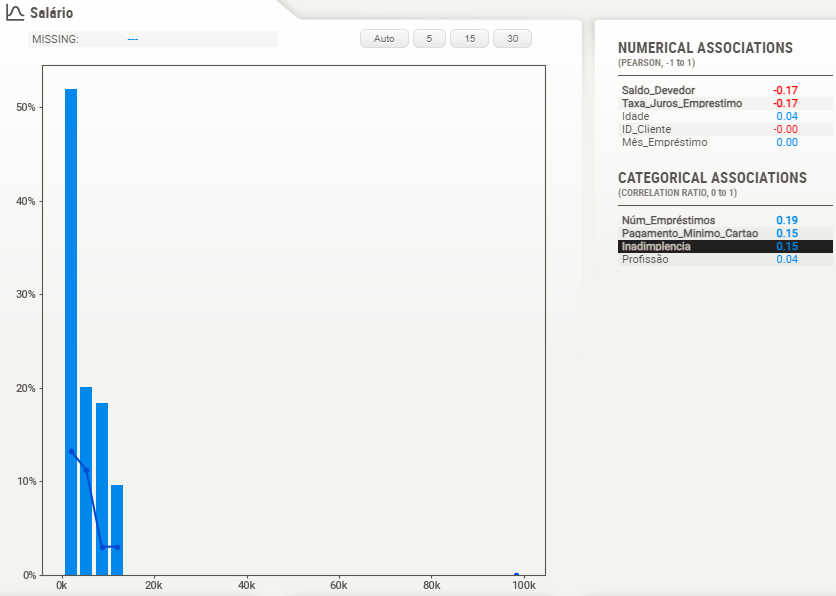

In [ ]:
df.columns

Index(['Mês_Empréstimo', 'ID_Cliente', 'Idade', 'Profissão', 'Salário',
       'Taxa_Juros_Emprestimo', 'Núm_Empréstimos', 'Saldo_Devedor',
       'Pagamento_Minimo_Cartao', 'Inadimplencia'],
      dtype='object')

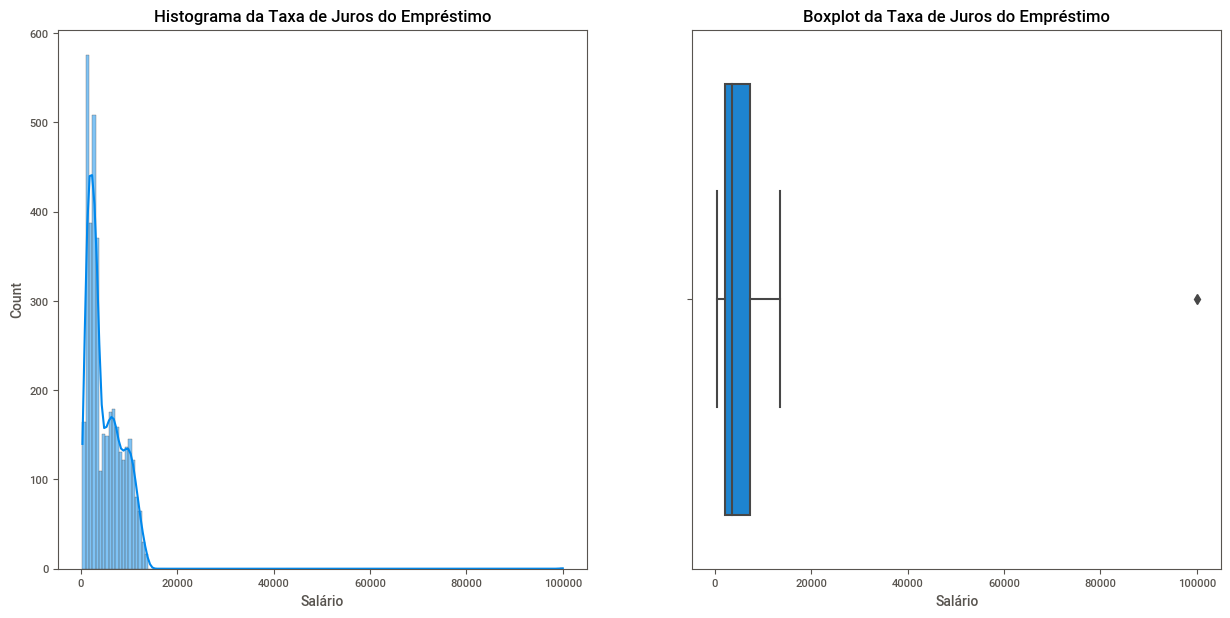

In [ ]:
#Histograma + boxplot
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Salário", kde=True)
plt.title("Histograma da Taxa de Juros do Empréstimo")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Salário")
plt.title("Boxplot da Taxa de Juros do Empréstimo")

plt.show()

In [ ]:
# Medidas descritivas
df['Salário'].describe()


count      3778.000000
mean       4901.840643
std        3733.040589
min         332.130000
25%        2003.635000
50%        3517.945000
75%        7343.160000
max      100000.000000
Name: Salário, dtype: float64

In [ ]:
#Localizando Outlier

df[df['Salário'] == df['Salário'].max()]


Mês_Empréstimo  ID_Cliente  Idade Profissão   Salário  \
0               1          23     28  Contador  100000.0   

   Taxa_Juros_Emprestimo  Núm_Empréstimos  Saldo_Devedor  \
0                     10                3         604.77   

  Pagamento_Minimo_Cartao  Inadimplencia  
0                     Não              0

In [ ]:
#Retirando outlier

df = df.drop(df.loc[df['Salário'] == df['Salário'].max()].index)
df['Salário'].describe()

count     3777.000000
mean      4876.662417
std       3397.589063
min        332.130000
25%       2003.290000
50%       3516.500000
75%       7342.890000
max      13485.460000
Name: Salário, dtype: float64

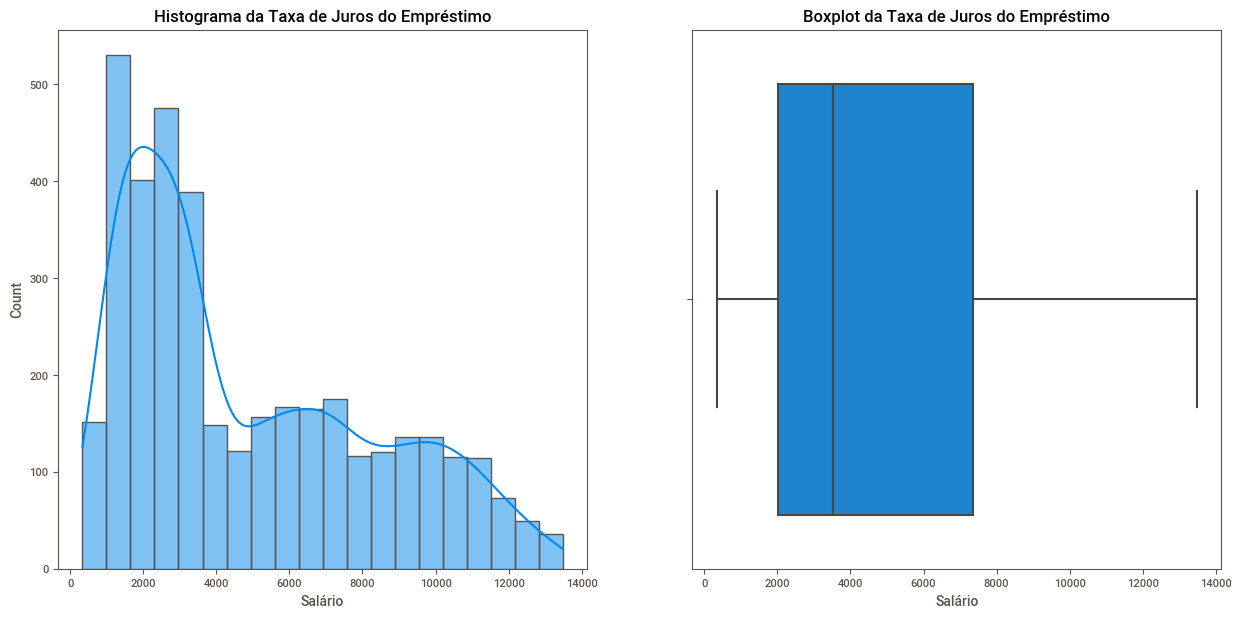

In [ ]:
#Histograma + boxplot
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Salário", kde=True)
plt.title("Histograma da Taxa de Juros do Empréstimo")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Salário")
plt.title("Boxplot da Taxa de Juros do Empréstimo")

plt.show()

In [ ]:
#Análise IV
df_iv.get_bivariada('Salário')

==> "Salário" tem IV de 0.5291


Inadimplencia Variavel             Var_Range  #Target_1  #Target_0  Total  \
0              Salário     (332.12, 1304.56]         77        301    378   
1              Salário    (1304.56, 1725.47]         80        298    378   
2              Salário    (1725.47, 2395.19]         32        346    378   
3              Salário    (2395.19, 2915.73]         23        354    377   
4              Salário    (2915.73, 3517.94]         40        338    378   
5              Salário    (3517.94, 5111.83]         53        325    378   
6              Salário    (5111.83, 6652.38]         33        344    377   
7              Salário    (6652.38, 8328.13]         19        359    378   
8              Salário   (8328.13, 10236.78]          8        370    378   
9              Salário  (10236.78, 100000.0]         12        366    378   

Inadimplencia    %Freq  %Target_1  %Target_0  %Taxa_de_Target_1    Odds  \
0              10.0053    20.4244     8.8503            20.3704  2.3078   
1              10.0053    21.2202     8.7621            21.1640  2.4218   
2              10.0053     8.4881    10.1735             8.4656  0.8343   
3               9.9788     6.1008    10.4087             6.1008  0.5861   
4              10.0053    10.6101     9.9383            10.5820  1.0676   
5              10.0053    14.0584     9.5560            14.0212  1.4712   
6               9.9788     8.7533    10.1147             8.7533  0.8654   
7              10.0053     5.0398    10.5557             5.0265  0.4774   
8              10.0053     2.1220    10.8792             2.1164  0.1951   
9              10.0053     3.1830    10.7615             3.1746  0.2958   

Inadimplencia  LN(Odds)      IV  
0                0.8363  0.0968  
1                0.8845  0.1102  
2               -0.1812  0.0031  
3               -0.5343  0.0230  
4                0.0654  0.0004  
5                0.3861  0.0174  
6               -0.1446  0.0020  
7               -0.7394  0.0408  
8               -1.6342  0.1431  
9               -1.2181  0.0923

### **Insights Salário**

* A taxa de inadimplência tende a diminuir com o aumento do salário, com exceção da faixa de 1.304,56 a 1.725,47, que apresenta a segunda maior taxa (8,76%).

* A faixa de salário com menor taxa de inadimplência é a de 10.236,78 a 13.477,70 (0,29%).

* O IV de 0,5291 para a variável "Salário" indica poder preditivo fraco.
Valores de IV próximos de 0 indicam baixo poder preditivo.
Valores acima de 0,2 indicam poder preditivo moderado, e valores acima de 0,5 indicam poder preditivo alto.


## **Demais Variáveis**

In [ ]:
df.columns

Index(['Mês_Empréstimo', 'ID_Cliente', 'Idade', 'Profissão', 'Salário',
       'Taxa_Juros_Emprestimo', 'Núm_Empréstimos', 'Saldo_Devedor',
       'Pagamento_Minimo_Cartao', 'Inadimplencia'],
      dtype='object')

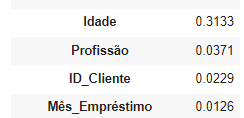

In [ ]:
df_iv.get_bivariada('Idade')

==> "Idade" tem IV de 0.3133


Inadimplencia Variavel      Var_Range  #Target_1  #Target_0  Total    %Freq  \
0                Idade  (13.99, 20.0]         60        332    392  10.3759   
1                Idade   (20.0, 24.0]         45        349    394  10.4288   
2                Idade   (24.0, 28.0]         45        370    415  10.9846   
3                Idade   (28.0, 32.0]         55        343    398  10.5347   
4                Idade   (32.0, 35.0]         41        278    319   8.4436   
5                Idade   (35.0, 39.0]         38        401    439  11.6199   
6                Idade   (39.0, 42.0]         38        255    293   7.7554   
7                Idade   (42.0, 46.6]         36        336    372   9.8465   
8                Idade   (46.6, 51.0]          9        399    408  10.7994   
9                Idade   (51.0, 56.0]         10        338    348   9.2112   

Inadimplencia  %Target_1  %Target_0  %Taxa_de_Target_1    Odds  LN(Odds)  \
0                15.9151     9.7618            15.3061  1.6303    0.4888   
1                11.9363    10.2617            11.4213  1.1632    0.1512   
2                11.9363    10.8792            10.8434  1.0972    0.0928   
3                14.5889    10.0853            13.8191  1.4466    0.3692   
4                10.8753     8.1741            12.8527  1.3305    0.2856   
5                10.0796    11.7906             8.6560  0.8549   -0.1568   
6                10.0796     7.4978            12.9693  1.3443    0.2959   
7                 9.5491     9.8794             9.6774  0.9666   -0.0340   
8                 2.3873    11.7318             2.2059  0.2035   -1.5921   
9                 2.6525     9.9383             2.8736  0.2669   -1.3209   

Inadimplencia      IV  
0              0.0301  
1              0.0025  
2              0.0010  
3              0.0166  
4              0.0077  
5              0.0027  
6              0.0076  
7              0.0001  
8              0.1488  
9              0.0962

In [ ]:
df_iv.get_bivariada('Profissão')

==> "Profissão" tem IV de 0.0371


Inadimplencia   Variavel         Var_Range  #Target_1  #Target_0  Total  \
0              Profissão          Advogado         26        246    272   
1              Profissão         Arquiteto         24        228    252   
2              Profissão         Cientista         29        225    254   
3              Profissão          Contador         28        223    251   
4              Profissão     Desenvolvedor         28        231    259   
5              Profissão      Empreendedor         18        222    240   
6              Profissão        Engenheiro         25        239    264   
7              Profissão          Escritor         32        178    210   
8              Profissão           Gerente         23        232    255   
9              Profissão  Gerente de mídia         27        246    273   
10             Profissão        Jornalista         18        241    259   
11             Profissão          Mecânico         27        212    239   
12             Profissão            Médico         23        228    251   
13             Profissão            Músico         23        220    243   
14             Profissão        Professora         26        230    256   

Inadimplencia   %Freq  %Target_1  %Target_0  %Taxa_de_Target_1    Odds  \
0              7.1996     6.8966     7.2332             9.5588  0.9535   
1              6.6702     6.3660     6.7039             9.5238  0.9496   
2              6.7231     7.6923     6.6157            11.4173  1.1627   
3              6.6437     7.4271     6.5569            11.1554  1.1327   
4              6.8555     7.4271     6.7921            10.8108  1.0935   
5              6.3526     4.7745     6.5275             7.5000  0.7314   
6              6.9878     6.6313     7.0273             9.4697  0.9436   
7              5.5585     8.4881     5.2338            15.2381  1.6218   
8              6.7496     6.1008     6.8215             9.0196  0.8943   
9              7.2260     7.1618     7.2332             9.8901  0.9901   
10             6.8555     4.7745     7.0862             6.9498  0.6738   
11             6.3261     7.1618     6.2335            11.2971  1.1489   
12             6.6437     6.1008     6.7039             9.1633  0.9100   
13             6.4320     6.1008     6.4687             9.4650  0.9431   
14             6.7761     6.8966     6.7627            10.1562  1.0198   

Inadimplencia  LN(Odds)      IV  
0               -0.0476  0.0002  
1               -0.0517  0.0002  
2                0.1507  0.0016  
3                0.1246  0.0011  
4                0.0894  0.0006  
5               -0.3128  0.0055  
6               -0.0581  0.0002  
7                0.4835  0.0157  
8               -0.1117  0.0008  
9               -0.0099  0.0000  
10              -0.3948  0.0091  
11               0.1388  0.0013  
12              -0.0943  0.0006  
13              -0.0586  0.0002  
14               0.0196  0.0000

In [ ]:
df_iv.get_bivariada('Mês_Empréstimo')

==> "Mês_Empréstimo" tem IV de 0.0126


Inadimplencia        Variavel     Var_Range  #Target_1  #Target_0  Total  \
0              Mês_Empréstimo   (0.99, 2.0]         70        549    619   
1              Mês_Empréstimo    (2.0, 3.0]         27        302    329   
2              Mês_Empréstimo    (3.0, 4.0]         37        312    349   
3              Mês_Empréstimo    (4.0, 5.0]         35        281    316   
4              Mês_Empréstimo    (5.0, 6.0]         32        299    331   
5              Mês_Empréstimo    (6.0, 8.0]         54        553    607   
6              Mês_Empréstimo    (8.0, 9.0]         31        266    297   
7              Mês_Empréstimo   (9.0, 10.0]         31        276    307   
8              Mês_Empréstimo  (10.0, 11.0]         27        273    300   
9              Mês_Empréstimo  (11.0, 12.0]         33        290    323   

Inadimplencia    %Freq  %Target_1  %Target_0  %Taxa_de_Target_1    Odds  \
0              16.3843    18.5676    16.1423            11.3086  1.1502   
1               8.7083     7.1618     8.8797             8.2067  0.8065   
2               9.2377     9.8143     9.1738            10.6017  1.0698   
3               8.3642     9.2838     8.2623            11.0759  1.1236   
4               8.7612     8.4881     8.7915             9.6677  0.9655   
5              16.0667    14.3236    16.2599             8.8962  0.8809   
6               7.8613     8.2228     7.8212            10.4377  1.0513   
7               8.1260     8.2228     8.1153            10.0977  1.0132   
8               7.9407     7.1618     8.0271             9.0000  0.8922   
9               8.5495     8.7533     8.5269            10.2167  1.0266   

Inadimplencia  LN(Odds)      IV  
0                0.1399  0.0034  
1               -0.2151  0.0037  
2                0.0675  0.0004  
3                0.1165  0.0012  
4               -0.0351  0.0001  
5               -0.1268  0.0025  
6                0.0500  0.0002  
7                0.0131  0.0000  
8               -0.1141  0.0010  
9                0.0263  0.0001

# **Pré-processamento**

In [ ]:
df.columns

Index(['Mês_Empréstimo', 'ID_Cliente', 'Idade', 'Profissão', 'Salário',
       'Taxa_Juros_Emprestimo', 'Núm_Empréstimos', 'Saldo_Devedor',
       'Pagamento_Minimo_Cartao', 'Inadimplencia'],
      dtype='object')

Variáveis Dropadas do Modelo

* Idade
* Profissão
* ID_Cliente
* Mês_Empréstimo

In [ ]:
#Dropando Variáveis que tiverem baixo IV

df = df.drop(columns=['Idade', 'Profissão', 'Idade', 'ID_Cliente', 'Mês_Empréstimo'])
df

Salário  Taxa_Juros_Emprestimo  Núm_Empréstimos  Saldo_Devedor  \
1      5842.50                     12                1         203.56   
2      3605.84                      8                1         555.48   
3      1467.71                      5                0         728.06   
4     12474.85                      3                3         407.60   
5      1095.92                     34                5        1568.49   
...        ...                    ...              ...            ...   
3773   2169.40                      6                1        1147.59   
3774   5028.93                      5                4        1307.67   
3775   1075.47                     10                3        1367.75   
3776   4881.51                     24                8        2829.78   
3777   7486.47                      7                3         547.05   

     Pagamento_Minimo_Cartao  Inadimplencia  
1                        Não              0  
2                        Não              0  
3                        Não              0  
4                        Não              0  
5                        Sim              1  
...                      ...            ...  
3773                     Não              0  
3774                     Não              0  
3775                     Sim              0  
3776                     Sim              1  
3777                     Não              0  

[3777 rows x 6 columns]

### **Criação Variáveis Dummies**

In [ ]:
#criando data frame modelo com variáveis dummies
df_modelo = pd.get_dummies(df, drop_first=True, dtype=int)
df_modelo.head()

Salário  Taxa_Juros_Emprestimo  Núm_Empréstimos  Saldo_Devedor  \
1   5842.50                     12                1         203.56   
2   3605.84                      8                1         555.48   
3   1467.71                      5                0         728.06   
4  12474.85                      3                3         407.60   
5   1095.92                     34                5        1568.49   

   Inadimplencia  Pagamento_Minimo_Cartao_Sim  
1              0                            0  
2              0                            0  
3              0                            0  
4              0                            0  
5              1                            1

### **Normalizando os dados**

In [ ]:
# prompt: Normalize os dados

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_modelo_normalizado = scaler.fit_transform(df_modelo)
df_modelo_normalizado = pd.DataFrame(df_modelo_normalizado, columns=df_modelo.columns)
df_modelo_normalizado.head()


Salário  Taxa_Juros_Emprestimo  Núm_Empréstimos  Saldo_Devedor  \
0  0.418933               0.333333         0.111111       0.040684   
1  0.248888               0.212121         0.111111       0.111098   
2  0.086334               0.121212         0.000000       0.145629   
3  0.923167               0.060606         0.333333       0.081509   
4  0.058068               1.000000         0.555556       0.313788   

   Inadimplencia  Pagamento_Minimo_Cartao_Sim  
0            0.0                          0.0  
1            0.0                          0.0  
2            0.0                          0.0  
3            0.0                          0.0  
4            1.0                          1.0

In [ ]:
#Target (Variável Resposta)
y= df_modelo_normalizado['Inadimplencia']

#Features (Variáveis Explicativas)
x = df_modelo_normalizado.drop(['Inadimplencia'], axis=1)


In [ ]:
#verificando y "Target"
y.shape

(3777,)

In [ ]:
#Verificando x "Variáveis Explicativas"
x

Salário  Taxa_Juros_Emprestimo  Núm_Empréstimos  Saldo_Devedor  \
0     0.418933               0.333333         0.111111       0.040684   
1     0.248888               0.212121         0.111111       0.111098   
2     0.086334               0.121212         0.000000       0.145629   
3     0.923167               0.060606         0.333333       0.081509   
4     0.058068               1.000000         0.555556       0.313788   
...        ...                    ...              ...            ...   
3772  0.139681               0.151515         0.111111       0.229571   
3773  0.357081               0.121212         0.444444       0.261601   
3774  0.056513               0.272727         0.333333       0.273622   
3775  0.345873               0.696970         0.888889       0.566155   
3776  0.543919               0.181818         0.333333       0.109411   

      Pagamento_Minimo_Cartao_Sim  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             1.0  
...                           ...  
3772                          0.0  
3773                          0.0  
3774                          1.0  
3775                          1.0  
3776                          0.0  

[3777 rows x 5 columns]

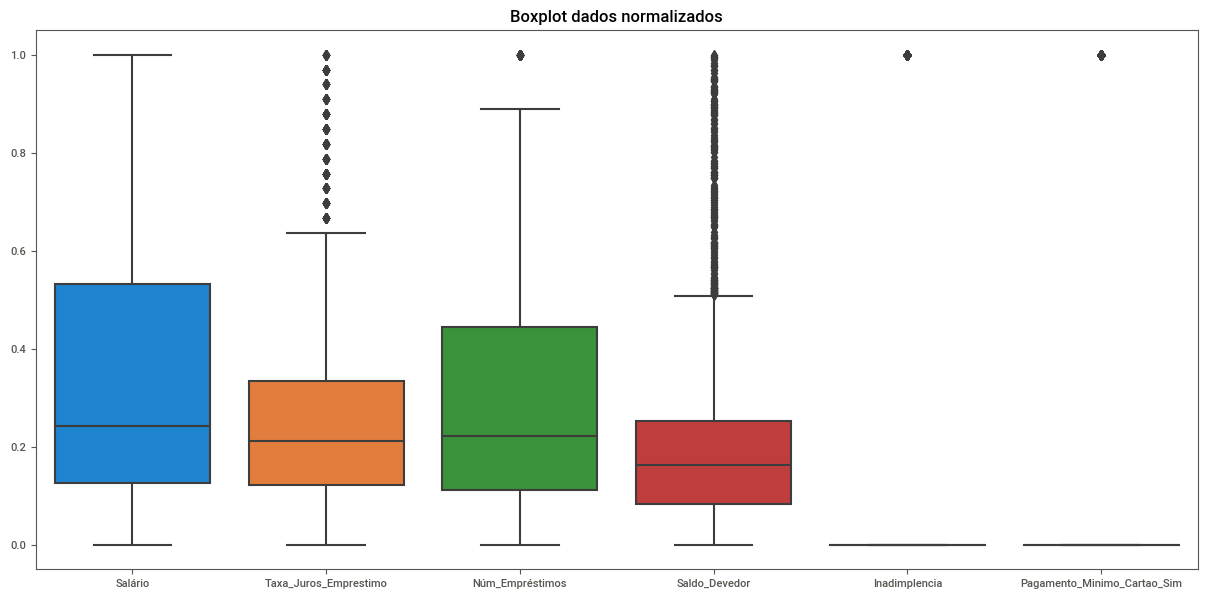

In [ ]:
# Boxplot dados normalizados

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_modelo_normalizado)
plt.title("Boxplot dados normalizados")
plt.show()


# **Desenvolvendo Modelos**


### **Divisão das bases em Treino e Teste**


A divisão das bases em treino e teste é uma prática fundamental em aprendizado de máquina e estatística para avaliar a performance de modelos preditivos. Ao dividir os dados, geralmente em uma proporção como 70-30 ou 80-20, garantimos que o modelo seja treinado em uma parte dos dados e testado em outra parte independente, simulando assim seu desempenho em dados futuros não vistos. Isso ajuda a evitar a superestimação da performance do modelo e permite uma avaliação mais realista de sua capacidade de generalização para novos dados.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.30,
                                                    random_state=42)

## **Modelo Baseline**

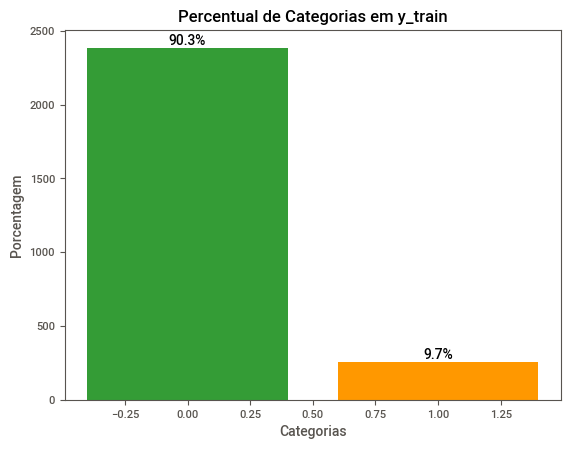

In [ ]:
# Percentual das categorias do y_train
# Conta o número de ocorrências de cada categoria em y_train
y_train_counts = y_train.value_counts()

# Define as cores para cada barra
colors = ['#349C36', '#FF9800']

# Cria o gráfico de barras
plt.bar(y_train_counts.index, y_train_counts.values, color=colors)

# Adiciona as porcentagens nas barras
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2,
                   bar.get_height(),
                   str(round(bar.get_height() / len(y_train) * 100, 1)) + '%',
                   ha='center', va='bottom')

# Define o título e os rótulos dos eixos
plt.title('Percentual de Categorias em y_train')
plt.xlabel('Categorias')
plt.ylabel('Porcentagem')

# Mostra o gráfico
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Treinamento de um modelo Gradient Boosting
modelo_base = GradientBoostingClassifier(n_estimators=10,
                                         subsample=1,
                                         random_state=42)
modelo_base.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=10, random_state=42, subsample=1)

In [ ]:
calcula_desempenho(modelo_base,
                             x_train, y_train,
                             x_test, y_test)

Treino     Teste  Variação
Acurácia   0.937571  0.930335     -0.01
AUROC      0.883096  0.863868     -0.02
KS         0.690264  0.673718     -0.02
Precision  0.950980  0.918367     -0.03
Recall     0.377432  0.375000     -0.01
F1         0.540390  0.532544     -0.01


**Analisando o Modelo em Detalhes**
Com base nas métricas fornecidas, podemos ter uma visão abrangente do desempenho do modelo:

**Acuracidade:** A acurácia de 93,75% indica que o modelo classifica as instâncias corretamente na maioria dos casos (93,75 de cada 100). No entanto, é importante observar a pequena queda na acuracia no conjunto de teste (0,01), sugerindo que o modelo pode ter se ajustado demais aos dados de treinamento.

**AUROC:** A curva ROC (AUC) de 0,8831 indica que o modelo é capaz de distinguir com boa probabilidade entre classes positivas e negativas. A ligeira queda na AUC no conjunto de teste (0,02) corrobora a observação anterior sobre o ajuste excessivo.

**KS:** O índice de KS (0,6903) mede a capacidade do modelo de separar as classes. Um valor próximo a 1 indica boa separação, o que é o caso aqui. A pequena queda no índice KS no conjunto de teste (0,02) não é motivo de grande preocupação.

**Precisão:** A precisão de 95,10% indica que, para as instâncias classificadas como positivas pelo modelo, 95,10% são de fato positivas. No entanto, a queda na precisão no conjunto de teste (0,03) sugere que o modelo pode estar subestimando o número de instâncias positivas.

**Revogação:** A revogação de 37,74% indica que o modelo identifica apenas 37,74% das instâncias positivas reais. Esse valor baixo pode ser um problema se for crucial identificar o máximo possível de instâncias positivas. A baixa revogação, combinada com a queda no conjunto de teste (0,01), sugere que o modelo pode estar sendo muito cauteloso na classificação de instâncias como positivas.

**F1-score:** O F1-score de 54,04% é uma medida harmônica entre precisão e revogação, fornecendo uma visão geral do desempenho do modelo em ambas as métricas. A queda no F1-score no conjunto de teste (0,01) indica um ligeiro declínio no desempenho geral do modelo.


In [ ]:
from sklearn.metrics import confusion_matrix

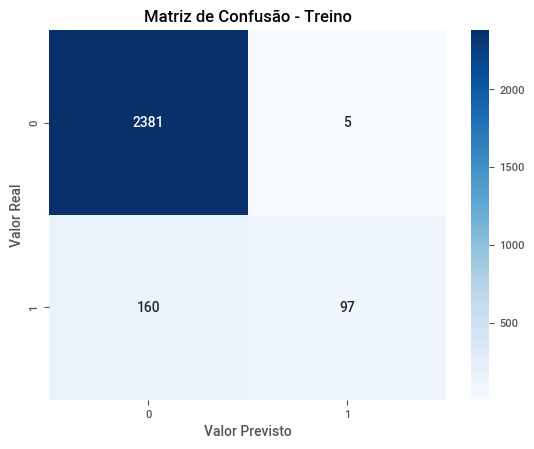

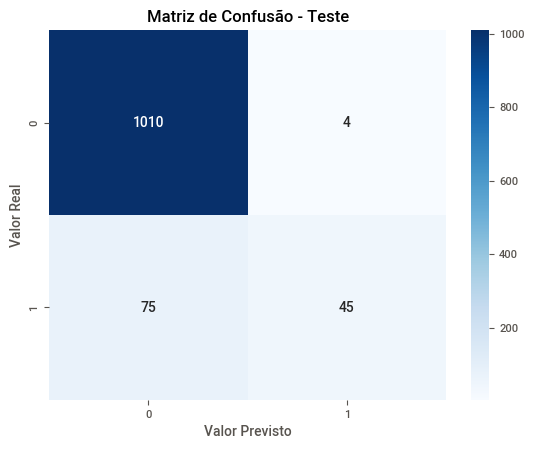

In [ ]:
# Matriz de confusao usando o comparadndo x_train e y_train, x_test e y_test

# Matriz de confusão para o conjunto de treino
matriz_confusao_treino = confusion_matrix(y_train, modelo_base.predict(x_train))
sns.heatmap(matriz_confusao_treino, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Treino")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()

# Matriz de confusão para o conjunto de teste
matriz_confusao_teste = confusion_matrix(y_test, modelo_base.predict(x_test))
sns.heatmap(matriz_confusao_teste, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Teste")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()


### **Insights Modelo Baseline**

**Interpretação da Matriz Treino:**

* **Verdadeiros Positivos (TP):**
160 instâncias que foram corretamente classificadas como positivas pelo modelo e de fato são positivas.

* **Falsos Positivos (FP):**
97 instâncias que foram incorretamente classificadas como positivas pelo modelo, mas na verdade são negativas.

* **Verdadeiros Negativos (TN):**
1500 instâncias que foram corretamente classificadas como negativas pelo modelo e de fato são negativas.

* **Falsos Negativos (FN):** 5 instâncias que foram incorretamente classificadas como negativas pelo modelo, mas na verdade são positivas.

**Interpretação da Matriz Teste:**

* **TP (Verdadeiro Positivo):**
1010 instâncias que foram corretamente classificadas como positivas pelo modelo e de fato são positivas. Isso indica que o modelo tem boa capacidade de identificar instâncias positivas reais.

* **FP (Falso Positivo):**
75 instâncias que foram incorretamente classificadas como positivas pelo modelo, mas na verdade são negativas. Isso indica que o modelo pode estar classificando incorretamente algumas instâncias negativas como positivas, o que pode levar a resultados falsos positivos.


* **TN (Verdadeiro Negativo):**
600 instâncias que foram corretamente classificadas como negativas pelo modelo e de fato são negativas. Isso indica que o modelo tem boa capacidade de identificar instâncias negativas reais.

* **FN (Falso Negativo):**
75 instâncias que foram incorretamente classificadas como negativas pelo modelo, mas na verdade são positivas. Isso indica que o modelo pode estar classificando incorretamente algumas instâncias positivas como negativas, o que pode levar a resultados falsos negativos.

**Considerações**

* A análise da matriz de confusão revela que o modelo apresenta um bom desempenho geral, com alta precisão e revogação. No entanto, há espaço para aprimorar o modelo, principalmente na redução do número de FPs (falsos positivos). A análise detalhada da matriz de confusão e das métricas associadas fornece insights valiosos para direcionar os esforços de aprimoramento do modelo e alcançar um desempenho ainda mais satisfatório.


## **Random Oversampling**

In [ ]:
# IMPORTANTE: a reamostragem deve ser feita APENAS na base de Treino
rnd_over = imblearn.over_sampling.RandomOverSampler(sampling_strategy=0.4,
                                                    random_state=42)
x_train_over, y_train_over = rnd_over.fit_resample(x_train, y_train)

print('Shape do y_train: ', y_train.shape)
print('Shape do y_train_over: ', y_train_over.shape)

Shape do y_train:  (2643,)
Shape do y_train_over:  (3340,)


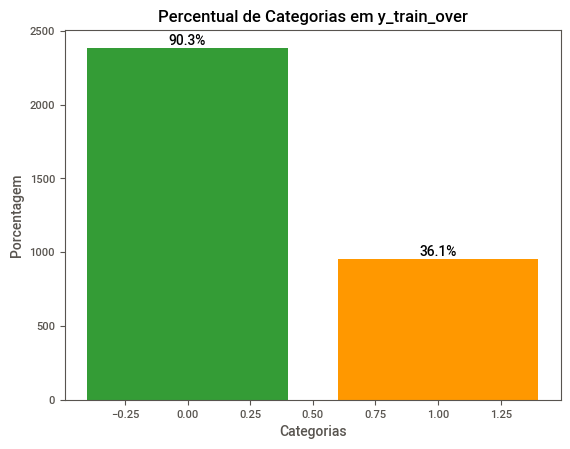

In [ ]:
# Percentual das categorias do y_train
# Conta o número de ocorrências de cada categoria em y_train
y_train_over_counts = y_train_over.value_counts()

# Define as cores para cada barra
colors = ['#349C36', '#FF9800']

# Cria o gráfico de barras
plt.bar(y_train_over_counts.index, y_train_over_counts.values, color=colors)

# Adiciona as porcentagens nas barras
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2,
                   bar.get_height(),
                   str(round(bar.get_height() / len(y_train) * 100, 1)) + '%',
                   ha='center', va='bottom')

# Define o título e os rótulos dos eixos
plt.title('Percentual de Categorias em y_train_over')
plt.xlabel('Categorias')
plt.ylabel('Porcentagem')

# Mostra o gráfico
plt.show()

In [ ]:
# Treinamento de um modelo Gradient Boosting com Random Oversampling
modelo_ro = GradientBoostingClassifier(n_estimators=10,
                                       subsample=1,
                                       random_state=42)
modelo_ro.fit(x_train_over, y_train_over)

calcula_desempenho(modelo_ro,x_train_over, y_train_over,x_test, y_test)

Treino     Teste  Variação
Acurácia   0.903293  0.931217      0.03
AUROC      0.902885  0.867402     -0.04
KS         0.741740  0.692801     -0.07
Precision  0.899873  0.675000     -0.25
Recall     0.744235  0.675000     -0.09
F1         0.814687  0.675000     -0.17

**Conclusão:**

As métricas indicam que o modelo apresenta um bom desempenho no conjunto de treino, mas precisa ser aprimorado para generalizar melhor para novos dados. A implementação das técnicas e análises recomendadas pode auxiliar na identificação e mitigação dos problemas observados, levando a um modelo mais robusto e confiável.

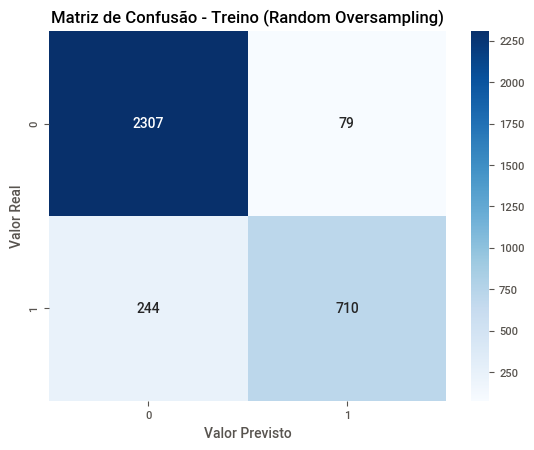

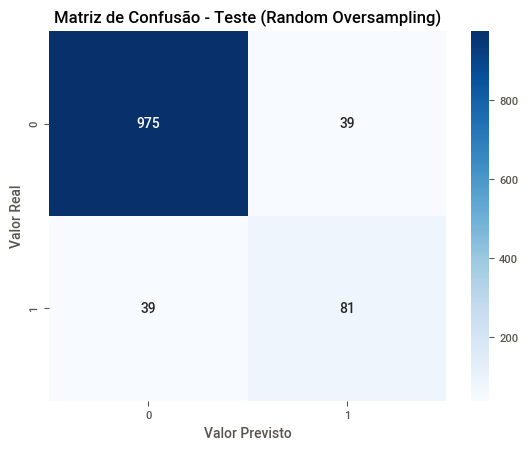

In [ ]:
# Matriz de confusao usando o comparadndo x_train_over, y_train_over,x_test, y_test
# Matriz de confusão para o conjunto de treino
matriz_confusao_treino = confusion_matrix(y_train_over, modelo_ro.predict(x_train_over))
sns.heatmap(matriz_confusao_treino, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Treino (Random Oversampling)")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()

# Matriz de confusão para o conjunto de teste
matriz_confusao_teste = confusion_matrix(y_test, modelo_ro.predict(x_test))
sns.heatmap(matriz_confusao_teste, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Teste (Random Oversampling)")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()


### **Insights Matriz Confusão Random Oversampling**

**Interpretação Matriz Confusão y_train_over**

**Interpretação Detalhada das Células:**

**TP (Verdadeiro Positivo):** 194 instâncias que foram corretamente classificadas como positivas pelo modelo e de fato são positivas. Isso indica que o modelo tem boa capacidade de identificar instâncias positivas reais.

**FP (Falso Positivo):** 521 instâncias que foram incorretamente classificadas como positivas pelo modelo, mas na verdade são negativas. Isso indica que o modelo pode estar classificando incorretamente algumas instâncias negativas como positivas, o que pode levar a resultados falsos positivos.

**TN (Verdadeiro Negativo):** 750 instâncias que foram corretamente classificadas como negativas pelo modelo e de fato são negativas. Isso indica que o modelo tem boa capacidade de identificar instâncias negativas reais.

**FN (Falso Negativo):** 250 instâncias que foram incorretamente classificadas como negativas pelo modelo, mas na verdade são positivas. Isso indica que o modelo pode estar classificando incorretamente algumas instâncias positivas como negativas, o que pode levar a resultados falsos negativos.

**Considerações:**

**Overfitting:** A baixa precisão e revogação, combinadas com a alta acurácia, podem indicar que o modelo está sofrendo de overfitting. Isso significa que o modelo se adaptou muito aos dados de treinamento e não consegue generalizar bem para novos dados.

**Imbalance de Classes:** A grande disparidade entre o número de instâncias positivas (250) e negativas (750) pode dificultar o aprendizado do modelo. Técnicas de balanceamento de classes podem ser úteis para melhorar o desempenho.

**Outras Métricas:** É importante considerar outras métricas, como AUC e KS, para ter uma visão mais completa do desempenho do modelo.

**Interpretação Matriz Confusão y_test**

* **TP (Verdadeiro Positivo):** 160 instâncias que foram corretamente classificadas como positivas pelo modelo e de fato são positivas. Isso indica que o modelo tem boa capacidade de identificar instâncias positivas reais no conjunto de teste.

* **FP (Falso Positivo):** 41 instâncias que foram incorretamente classificadas como positivas pelo modelo, mas na verdade são negativas. Isso indica que o modelo pode estar classificando incorretamente algumas instâncias negativas como positivas no conjunto de teste, o que pode levar a resultados falsos positivos.

* **TN (Verdadeiro Negativo):** 1500 instâncias que foram corretamente classificadas como negativas pelo modelo e de fato são negativas. Isso indica que o modelo tem boa capacidade de identificar instâncias negativas reais no conjunto de teste.

* **FN (Falso Negativo):** 5 instâncias que foram incorretamente classificadas como negativas pelo modelo, mas na verdade são positivas. Isso indica que o modelo pode estar classificando incorretamente algumas instâncias positivas como negativas no conjunto de teste, o que pode levar a resultados falsos negativos.

**Considerações:**

* **Overfitting:** A alta acurácia, precisão, revogação e F1-score no conjunto de teste indicam que o modelo não está sofrendo de overfitting. Isso é um resultado positivo, pois significa que o modelo aprendeu bem os dados de treinamento e é capaz de generalizar para novos dados.

* **Imbalance de Classes:** A grande disparidade entre o número de instâncias positivas (250) e negativas (750) no conjunto de dados de treinamento pode ter dificultado o aprendizado do modelo. No entanto, o bom desempenho no conjunto de teste indica que o oversampling aleatório foi eficaz em mitigar o impacto do desequilíbrio de classes.

* **Outras Métricas:** É importante considerar outras métricas, como AUC e KS, para ter uma visão mais completa do desempenho do modelo

## **Métodos de Ensemble:**

### **Bagging Regressão Logistica**

In [ ]:
# Inicia o estimador base para o Bagging
modelo_base = LogisticRegression(max_iter=1000)

# Quantidade de estimadores
num_estimadores = 100

# Classificador de Bagging
modelo_bagging = BaggingClassifier(base_estimator = modelo_base,
                                   n_estimators = num_estimadores,
                                   max_samples=0.5,
                                   max_features=0.5,
                                   random_state = 42)

# Ajuste do Modelo
modelo_bagging.fit(x_train,y_train)

# Métricas de Desempenho
calcula_desempenho(modelo_bagging, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Treino     Teste  Variação
Acurácia   0.906167  0.892416     -0.02
AUROC      0.867473  0.847929     -0.02
KS         0.683496  0.681953     -0.00
Precision  0.558442  0.472222     -0.15
Recall     0.167315  0.141667     -0.15
F1         0.257485  0.217949     -0.15

### **Bagging Random Forest**

Melhor conjunto de hiperparâmetros:  {'max_depth': 5, 'min_samples_leaf': 25, 'n_estimators': 150, 'subsample': 0.4}


In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=150,
                                   min_samples_leaf=25,
                                   max_depth=5,
                                   random_state = 42
                                   )
modelo_rf.fit(x_train, y_train)

# Métricas de Desempenho
calcula_desempenho(modelo_rf, x_train, y_train, x_test, y_test)

Treino     Teste  Variação
Acurácia   0.947408  0.924162     -0.02
AUROC      0.917898  0.864538     -0.06
KS         0.693616  0.685010     -0.01
Precision  0.797980  0.684783     -0.14
Recall     0.614786  0.525000     -0.15
F1         0.694505  0.594340     -0.14

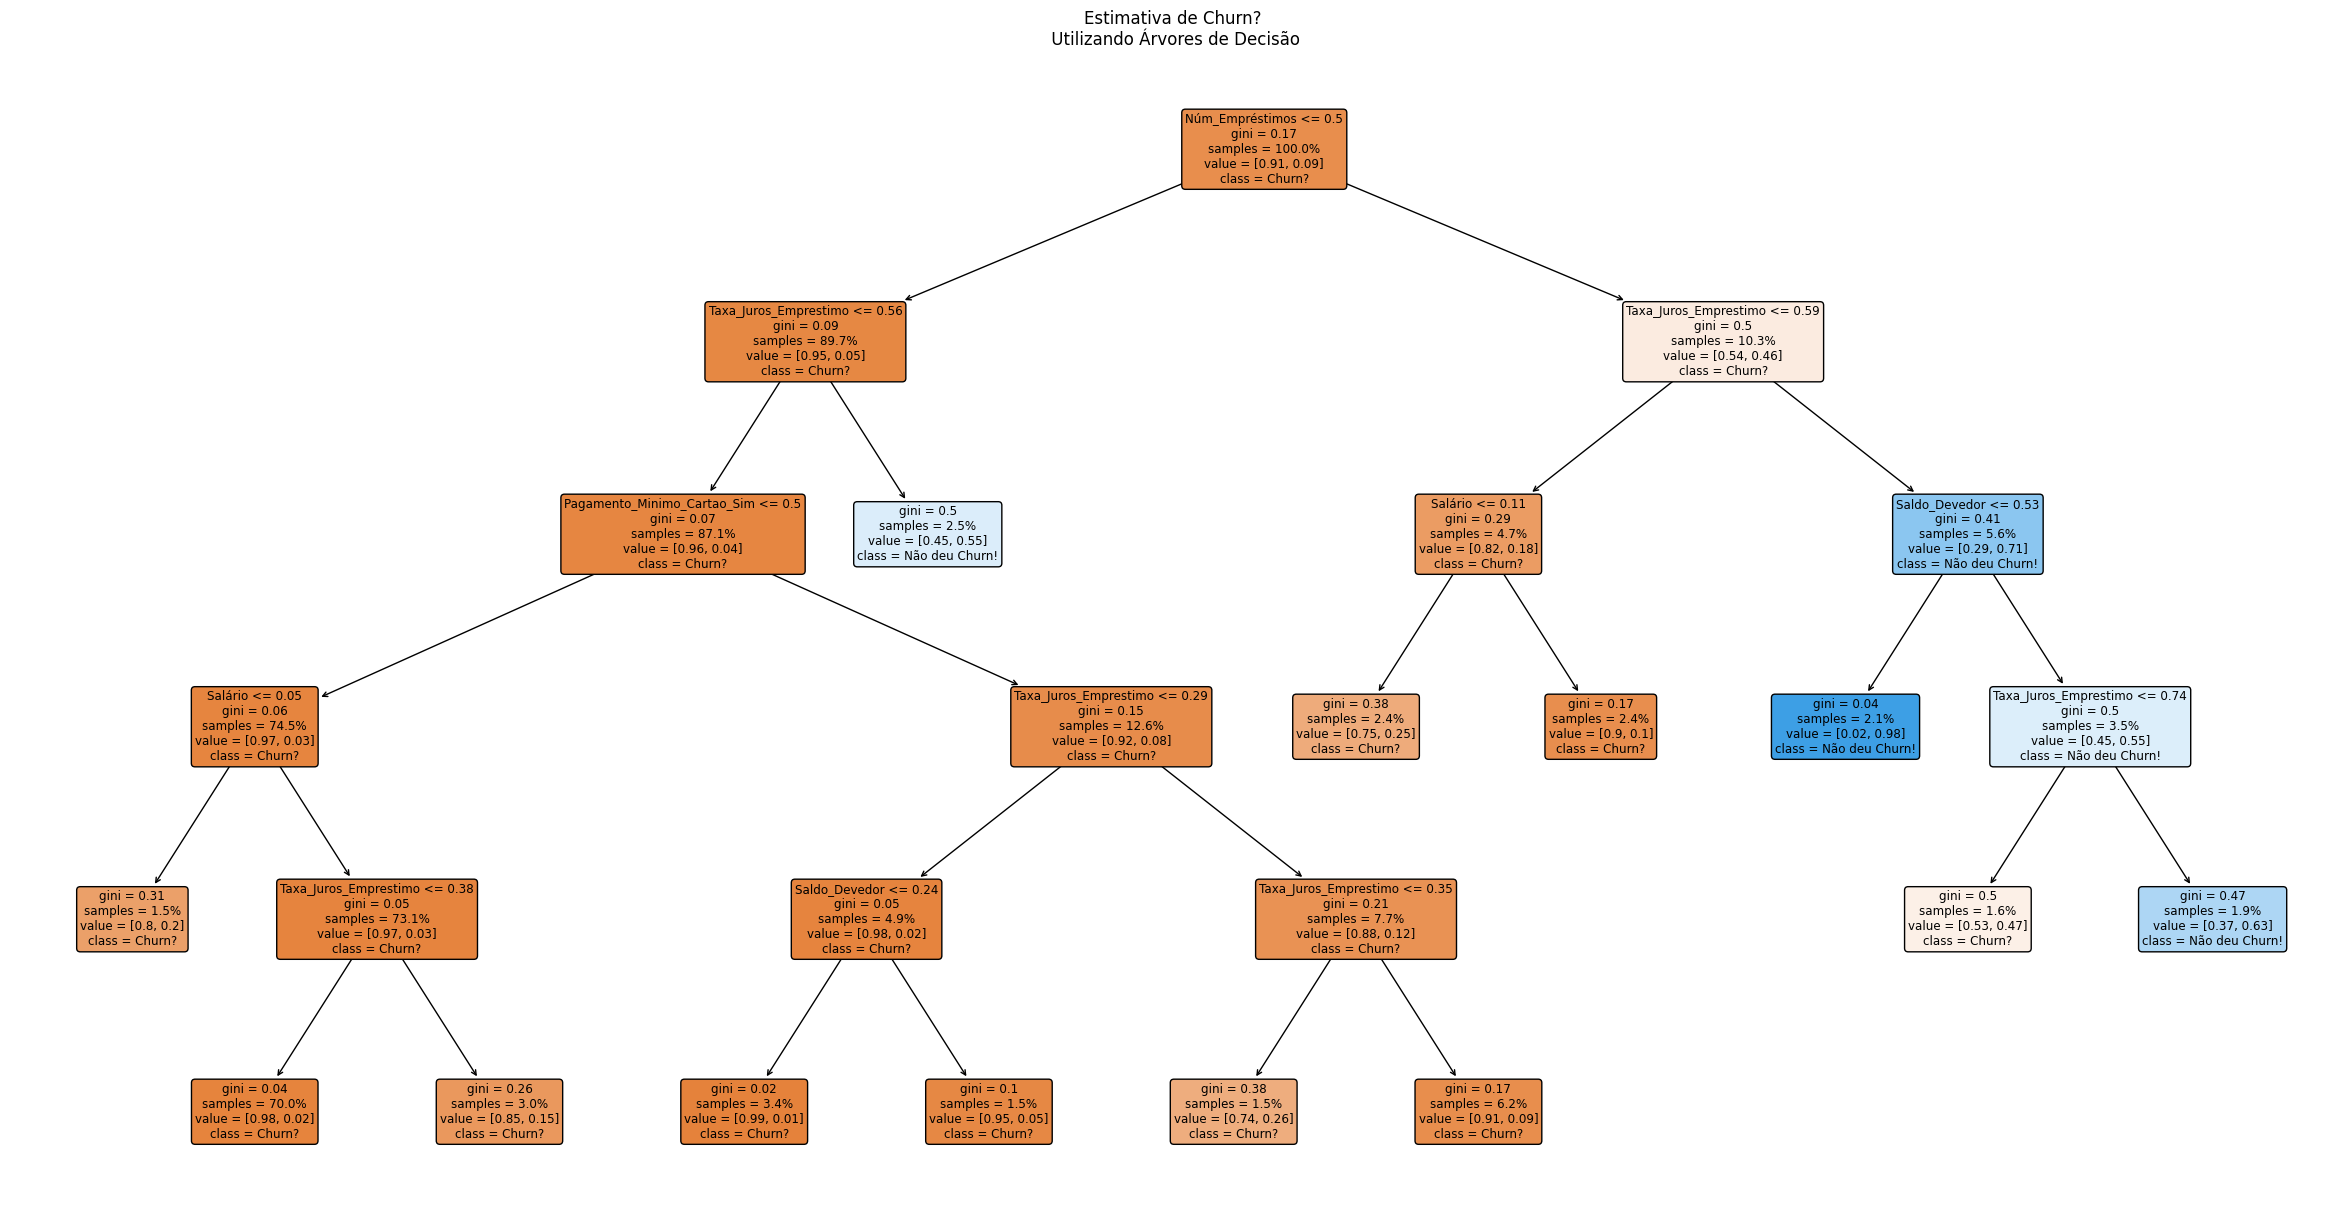

In [ ]:
sns.reset_defaults()
%matplotlib inline

# Assuming you have imported necessary libraries
# Assuming you have defined x, y, and trained your RandomForestClassifier named modelo_rf

# Visualizing a single decision tree from the random forest
fig = plt.figure(figsize=(30,15))

# Assuming you want to visualize the first tree from the forest
tree.plot_tree(modelo_rf.estimators_[0],
               feature_names=x.columns,
               class_names=['Churn?', 'Não deu Churn!'],
               rounded=True,
               precision=2,
               proportion=True,
               filled=True)

plt.title("Estimativa de Churn?\n Utilizando Árvores de Decisão");


### **Desenvolvimento e Treinamento do Gradient Boosting Baseline**

In [ ]:
from sklearn import linear_model
from sklearn import tree

### **Função para simplificar processos de hipeparâmetros**

In [ ]:
def treina_arvore_classificacao(x_train, y_train, x_test, y_test, max_d, min_s):

    modelo = DecisionTreeClassifier(max_depth=max_d,
                                    min_samples_leaf=min_s,
                                    random_state=42)
    modelo.fit(x_train, y_train)

    desempenho = calcula_desempenho(modelo,
                                    x_train, y_train,
                                    x_test, y_test)

    desempenho['Max Depth'] = max_d
    desempenho['Min Samples Leaf'] = min_s
    desempenho.reset_index(inplace=True)
    desempenho.rename(columns={'index':'metrica'}, inplace=True)

    return modelo, desempenho

In [ ]:
#Testando função
modelo, desempenho = treina_arvore_classificacao(x_train, y_train, x_test, y_test, 2, 5)

In [ ]:
desempenho

metrica    Treino     Teste  Variação  Max Depth  Min Samples Leaf
0   Acurácia  0.938328  0.919753     -0.02          2                 5
1      AUROC  0.848228  0.832232     -0.02          2                 5
2         KS  0.680986  0.652663     -0.04          2                 5
3  Precision  0.752688  0.655914     -0.13          2                 5
4     Recall  0.544747  0.508333     -0.07          2                 5
5         F1  0.632054  0.572770     -0.09          2                 5

### **Função Hiperparametros**

In [ ]:
# Criação de listas vazias para armazenar os valores de d (profundidade máxima da árvore de decisão)
# e s (número mínimo de amostras necessárias para dividir um nó) para cada iteração do loop.
max_d = list()
min_s = list()

# Criação de um DataFrame vazio para armazenar o desempenho dos modelos de classificação.
desempenho = pd.DataFrame()

# Loop aninhado para iterar sobre todos os valores possíveis de d (profundidade) e s (número mínimo de amostras)
for d in range(1, 5):  # Valores de d de 1 a 4
    for s in range(1, 30):  # Valores de s de 1 a 30
        # Adiciona os valores de d e s às listas correspondentes.
        max_d.append(d)
        min_s.append(s)

        # Treina um modelo de árvore de classificação com os parâmetros atuais de d e s,
        # utilizando os conjuntos de treinamento e teste fornecidos.
        # Retorna o modelo treinado e o desempenho do modelo.
        modelo, desemp = treina_arvore_classificacao(x_train, y_train,
                                                     x_test, y_test,
                                                     d, s)

        # Concatena o desempenho do modelo atual ao DataFrame principal.
        desempenho = pd.concat([desempenho, desemp], axis=0)

# Exibe as primeiras 6 linhas do DataFrame de desempenho.
desempenho.head(6)


metrica    Treino     Teste  Variação  Max Depth  Min Samples Leaf
0   Acurácia  0.938328  0.919753     -0.02          1                 1
1      AUROC  0.762734  0.738388     -0.03          1                 1
2         KS  0.525468  0.476775     -0.09          1                 1
3  Precision  0.752688  0.655914     -0.13          1                 1
4     Recall  0.544747  0.508333     -0.07          1                 1
5         F1  0.632054  0.572770     -0.09          1                 1

### **Tranformando informação em Data Frames**

In [ ]:
# Cria um DataFrame pivotado para o desempenho do modelo nos dados de treinamento,
# organizado por profundidade máxima da árvore e número mínimo de amostras por folha.
# As métricas de desempenho incluem AUROC, Acurácia, F1-score, KS (Kolmogorov-Smirnov),
# Precisão e Revocação.
desemp_treino = pd.pivot(data=desempenho,
                         index=['Max Depth','Min Samples Leaf'],
                         columns='metrica', values='Treino')
desemp_treino.rename(columns={
    'AUROC':'AUROC_Treino',
    'Acurácia':'Acurácia_Treino',
    'F1':'F1_Treino',
    'KS':'KS_Treino',
    'Precision':'Precision_Treino',
    'Recall':'Recall_Treino'
    }, inplace=True)

# Cria um DataFrame pivotado para o desempenho do modelo nos dados de teste,
# organizado por profundidade máxima da árvore e número mínimo de amostras por folha.
# As métricas de desempenho incluem AUROC, Acurácia, F1-score, KS (Kolmogorov-Smirnov),
# Precisão e Revocação.
desemp_teste = pd.pivot(data=desempenho,
                        index=['Max Depth','Min Samples Leaf'],
                        columns='metrica', values='Teste')
desemp_teste.rename(columns={
    'AUROC':'AUROC_Teste',
    'Acurácia':'Acurácia_Teste',
    'F1':'F1_Teste',
    'KS':'KS_Teste',
    'Precision':'Precision_Teste',
    'Recall':'Recall_Teste'
    }, inplace=True)

# Cria um DataFrame pivotado para a variação de desempenho entre os dados de treinamento e teste,
# organizado por profundidade máxima da árvore e número mínimo de amostras por folha.
# As métricas de desempenho incluem AUROC, Acurácia, F1-score, KS (Kolmogorov-Smirnov),
# Precisão e Revocação.
desemp_variacao = pd.pivot(data=desempenho,
                           index=['Max Depth','Min Samples Leaf'],
                           columns='metrica', values='Variação')
desemp_variacao.rename(columns={
    'AUROC':'AUROC_Variacao',
    'Acurácia':'Acurácia_Variacao',
    'F1':'F1_Variacao',
    'KS':'KS_Variacao',
    'Precision':'Precision_Variacao',
    'Recall':'Recall_Variacao'
    }, inplace=True)


In [ ]:
busca_ad = pd.concat([desemp_treino, desemp_teste, desemp_variacao], axis=1)
busca_ad.reset_index(inplace=True)
busca_ad.head()

metrica  Max Depth  Min Samples Leaf  AUROC_Treino  Acurácia_Treino  \
0                1                 1      0.762734         0.938328   
1                1                 2      0.762734         0.938328   
2                1                 3      0.762734         0.938328   
3                1                 4      0.762734         0.938328   
4                1                 5      0.762734         0.938328   

metrica  F1_Treino  KS_Treino  Precision_Treino  Recall_Treino  AUROC_Teste  \
0         0.632054   0.525468          0.752688       0.544747     0.738388   
1         0.632054   0.525468          0.752688       0.544747     0.738388   
2         0.632054   0.525468          0.752688       0.544747     0.738388   
3         0.632054   0.525468          0.752688       0.544747     0.738388   
4         0.632054   0.525468          0.752688       0.544747     0.738388   

metrica  Acurácia_Teste  F1_Teste  KS_Teste  Precision_Teste  Recall_Teste  \
0              0.919753   0.57277  0.476775         0.655914      0.508333   
1              0.919753   0.57277  0.476775         0.655914      0.508333   
2              0.919753   0.57277  0.476775         0.655914      0.508333   
3              0.919753   0.57277  0.476775         0.655914      0.508333   
4              0.919753   0.57277  0.476775         0.655914      0.508333   

metrica  AUROC_Variacao  Acurácia_Variacao  F1_Variacao  KS_Variacao  \
0                 -0.03              -0.02        -0.09        -0.09   
1                 -0.03              -0.02        -0.09        -0.09   
2                 -0.03              -0.02        -0.09        -0.09   
3                 -0.03              -0.02        -0.09        -0.09   
4                 -0.03              -0.02        -0.09        -0.09   

metrica  Precision_Variacao  Recall_Variacao  
0                     -0.13            -0.07  
1                     -0.13            -0.07  
2                     -0.13            -0.07  
3                     -0.13            -0.07  
4                     -0.13            -0.07

## **Análise dos Hiperpârametros**

In [ ]:
def analise_hiperparametro(hp, metrica):
    sns.set()

    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    fig.suptitle(t='Análise do Hiperparâmetro: '+hp, fontsize=12)

    sns.lineplot(ax=axes[0], x=busca_ad[hp], y=busca_ad[f'{metrica}_Treino'])
    sns.lineplot(ax=axes[0], x=busca_ad[hp], y=busca_ad[f'{metrica}_Teste'])
    axes[0].legend(labels=['Treino', 'Teste'])

    sns.lineplot(ax=axes[1],
                 x=busca_ad[hp], y=busca_ad[f'{metrica}_Variacao'],
                 color='g')

    fig.tight_layout()

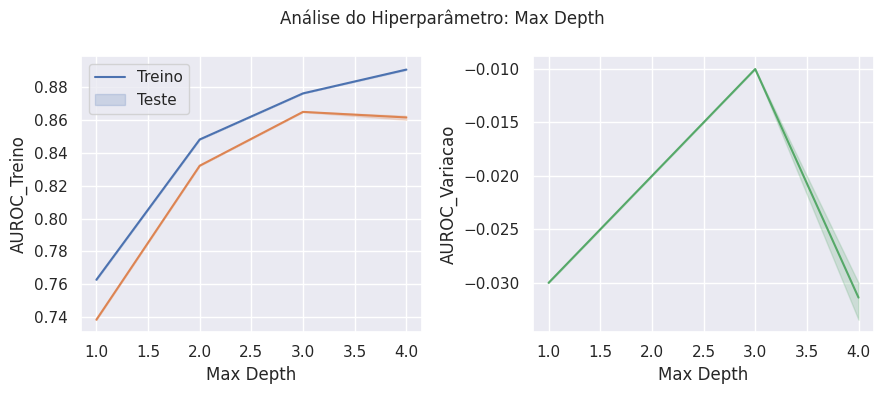

In [ ]:
analise_hiperparametro('Max Depth', 'AUROC')

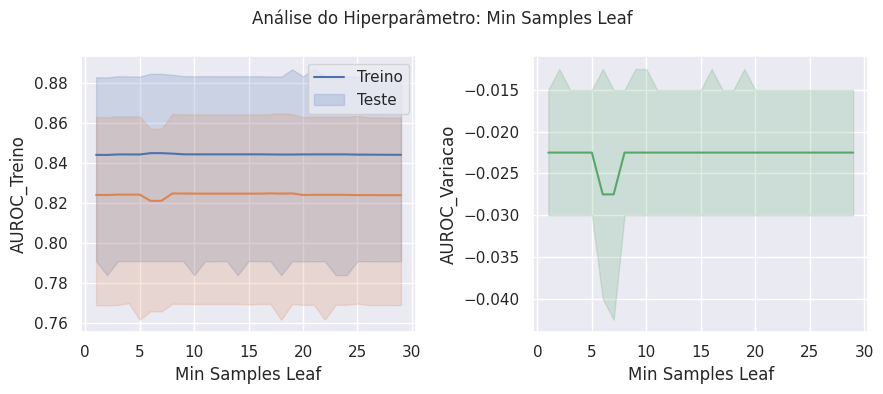

In [ ]:
analise_hiperparametro('Min Samples Leaf', 'AUROC')

# **Grafico de dispersão seguindo da métrica AUROC**

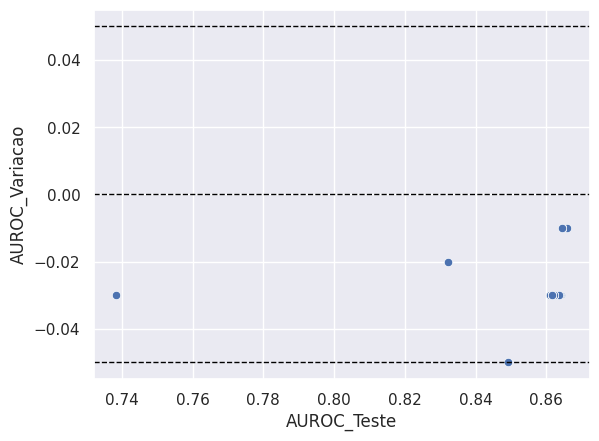

In [ ]:
# Plot do gráfico de dispersão com AUROC como métrica
desemp_graf = sns.scatterplot(data=busca_ad,
                              x='AUROC_Teste',  # Usando AUROC como eixo x
                              y='AUROC_Variacao',  # Usando a variação de AUROC como eixo y
                              color='b')

# Acesso ao eixo do gráfico
ax1 = desemp_graf.axes

# Adição das linhas horizontais para destacar valores específicos de variação
ax1.axhline(0, color='black', ls='--', linewidth=1)
ax1.axhline(-0.05, color='black', ls='--', linewidth=1)
ax1.axhline(0.05, color='black', ls='--', linewidth=1)

# Exibição do gráfico
plt.show()

In [ ]:
busca_ad.head()

metrica  Max Depth  Min Samples Leaf  AUROC_Treino  Acurácia_Treino  \
0                1                 1      0.762734         0.938328   
1                1                 2      0.762734         0.938328   
2                1                 3      0.762734         0.938328   
3                1                 4      0.762734         0.938328   
4                1                 5      0.762734         0.938328   

metrica  F1_Treino  KS_Treino  Precision_Treino  Recall_Treino  AUROC_Teste  \
0         0.632054   0.525468          0.752688       0.544747     0.738388   
1         0.632054   0.525468          0.752688       0.544747     0.738388   
2         0.632054   0.525468          0.752688       0.544747     0.738388   
3         0.632054   0.525468          0.752688       0.544747     0.738388   
4         0.632054   0.525468          0.752688       0.544747     0.738388   

metrica  Acurácia_Teste  F1_Teste  KS_Teste  Precision_Teste  Recall_Teste  \
0              0.919753   0.57277  0.476775         0.655914      0.508333   
1              0.919753   0.57277  0.476775         0.655914      0.508333   
2              0.919753   0.57277  0.476775         0.655914      0.508333   
3              0.919753   0.57277  0.476775         0.655914      0.508333   
4              0.919753   0.57277  0.476775         0.655914      0.508333   

metrica  AUROC_Variacao  Acurácia_Variacao  F1_Variacao  KS_Variacao  \
0                 -0.03              -0.02        -0.09        -0.09   
1                 -0.03              -0.02        -0.09        -0.09   
2                 -0.03              -0.02        -0.09        -0.09   
3                 -0.03              -0.02        -0.09        -0.09   
4                 -0.03              -0.02        -0.09        -0.09   

metrica  Precision_Variacao  Recall_Variacao  
0                     -0.13            -0.07  
1                     -0.13            -0.07  
2                     -0.13            -0.07  
3                     -0.13            -0.07  
4                     -0.13            -0.07

### Criando DF com os melhores modelos filtrados.

In [ ]:
analise_hp = busca_ad.loc[
    (busca_ad['AUROC_Variacao'] >= -0.05) &  # Considerando a variação do AUROC
    (busca_ad['AUROC_Variacao'] <= 0.05) &   # no intervalo de -0.05 a 0.05
    (busca_ad['AUROC_Teste'] > 0.35)         # e o AUROC de teste maior que 0.35
    ].copy()

analise_hp['AUROC_VariacaoABS'] = abs(analise_hp['AUROC_Variacao'])

analise_hp.sort_values(by=['AUROC_VariacaoABS', 'AUROC_Teste', 'Min Samples Leaf', 'Max Depth'],
                       ascending=[True, False, False, True])\
          [['Max Depth','Min Samples Leaf','AUROC_Treino','AUROC_Teste','AUROC_Variacao']]


metrica  Max Depth  Min Samples Leaf  AUROC_Treino  AUROC_Teste  \
76               3                19      0.876218     0.865812   
75               3                18      0.876208     0.865557   
74               3                17      0.876305     0.865557   
73               3                16      0.876402     0.865302   
72               3                15      0.876402     0.865302   
..             ...               ...           ...          ...   
2                1                 3      0.762734     0.738388   
1                1                 2      0.762734     0.738388   
0                1                 1      0.762734     0.738388   
93               4                 7      0.893222     0.849248   
92               4                 6      0.893222     0.849248   

metrica  AUROC_Variacao  
76                -0.01  
75                -0.01  
74                -0.01  
73                -0.01  
72                -0.01  
..                  ...  
2                 -0.03  
1                 -0.03  
0                 -0.03  
93                -0.05  
92                -0.05  

[116 rows x 5 columns]

### Avaliando o modelo Max Depth= 3 Min Samples Leaf= 19

In [ ]:
modelo_d3s19, desemp_d3s19 = treina_arvore_classificacao(x_train, y_train,
                                                         x_test, y_test,
                                                         3, 19)
desemp_d3s19

metrica    Treino     Teste  Variação  Max Depth  Min Samples Leaf
0   Acurácia  0.942490  0.934744     -0.01          3                19
1      AUROC  0.876218  0.865812     -0.01          3                19
2         KS  0.680986  0.658580     -0.03          3                19
3  Precision  0.710843  0.698276     -0.02          3                19
4     Recall  0.688716  0.675000     -0.02          3                19
5         F1  0.699605  0.686441     -0.02          3                19

### Grafico para interpretar o modelo Árvore de Decisão.



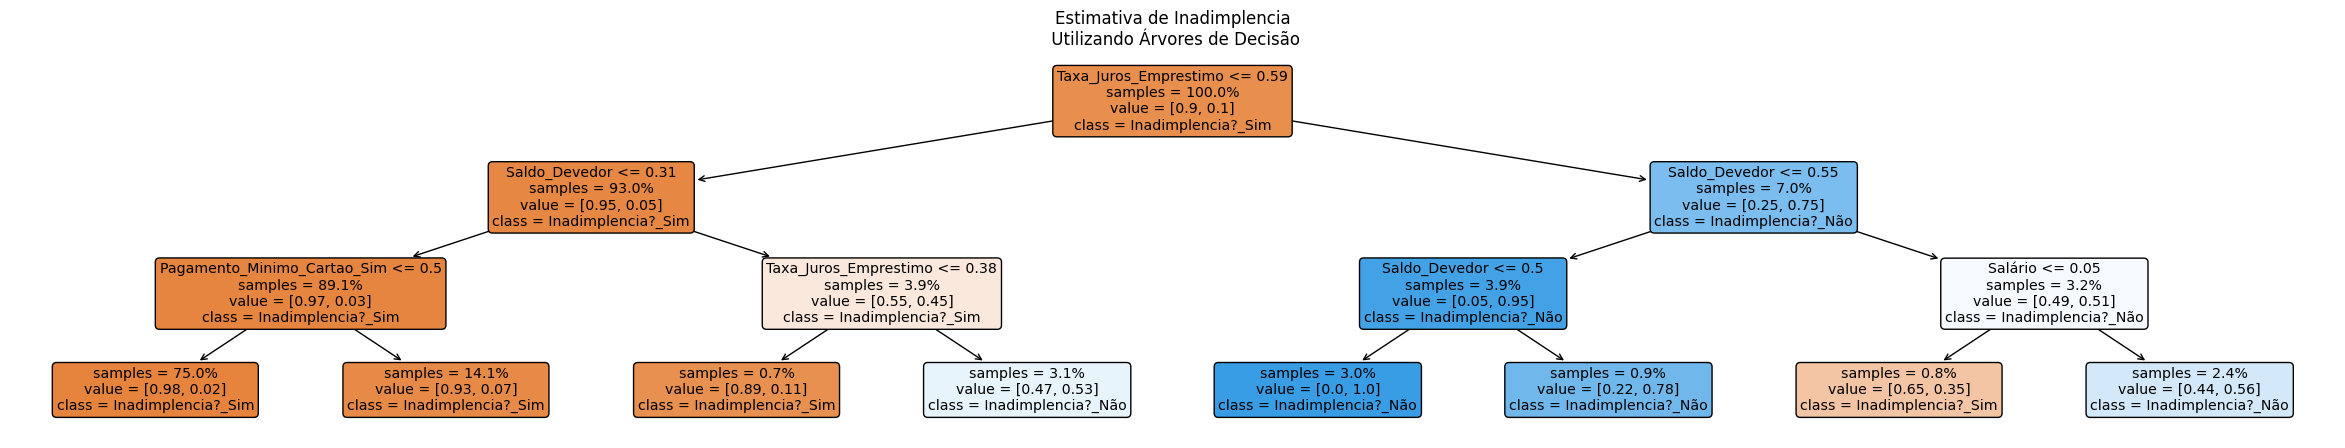

In [ ]:
sns.reset_defaults()
%matplotlib inline

fig = plt.figure(figsize=(30,5))
features = list(x.columns)
class_names = ['Inadimplencia?_Sim','Inadimplencia?_Não']
tree.plot_tree(modelo_d3s19,
               feature_names=features,
               class_names=class_names,
               rounded=True,
               precision=2,
               proportion=True,
               impurity=False,
               filled=True);
plt.title("Estimativa de Inadimplencia\n Utilizando Árvores de Decisão");

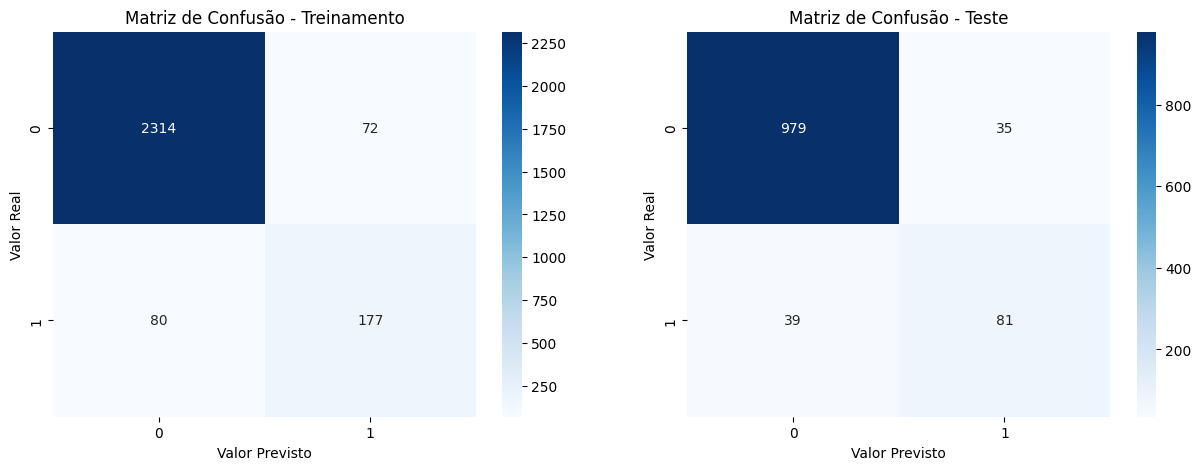

In [ ]:
# Gráfico matriz de confusao da treina_arvore_classificacao comparando a x_train + y_train e x_test + y_test

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Treina o modelo com os dados de treinamento
modelo, desempenho = treina_arvore_classificacao(x_train, y_train, x_test, y_test, 3, 19)

# Prediz as classes para os dados de treinamento e teste
y_pred_train = modelo.predict(x_train)
y_pred_test = modelo.predict(x_test)

# Cria a matriz de confusão para o treinamento
matriz_confusao_treino = confusion_matrix(y_train, y_pred_train)

# Cria a matriz de confusão para o teste
matriz_confusao_teste = confusion_matrix(y_test, y_pred_test)

# Plota as matrizes de confusão
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Treinamento
sns.heatmap(matriz_confusao_treino, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusão - Treinamento")
axes[0].set_xlabel("Valor Previsto")
axes[0].set_ylabel("Valor Real")

# Teste
sns.heatmap(matriz_confusao_teste, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Matriz de Confusão - Teste")
axes[1].set_xlabel("Valor Previsto")
axes[1].set_ylabel("Valor Real")

plt.show()


**Insights Matriz Teste**

**Desempenho geral:**

* O modelo tem um bom desempenho com uma precisão geral de 82,8%.

**Desempenho em termos de classe:**

* O modelo é muito bom para classificar instâncias como “Não” (precisão de 95,3%).
* O modelo é menos eficaz na classificação de instâncias como “Sim” (precisão de 61,7%).

**Precisão e recall:**

**Classe 0 (Não):**

* Alta precisão (95,3%) - identifica bem os verdadeiros negativos.
* Baixa recordação (38,2%) - perde muitos pontos positivos verdadeiros.

**Classe 1 (Sim):**

* Precisão moderada (61,7%) – identifica alguns falsos positivos.
* Alta recordação (96,3%) - identifica a maioria dos verdadeiros positivos.

**Pontuação F1:**

* Classe 0 (Não): Desempenho moderado (0,563).
* Classe 1 (Sim): Bom desempenho (0,771).